# Leading Indicator Assessment: Elon Musk Tweet

Paul R. Phillips
12/11/21

**Actionable Insights**<br>
1. Elon Musk crypto-related tweets seem to be a leading indicator for price changes in Shiba Inu

The cross-correlational plots and Granger test of Causality both support this finding. This makes sense when comparing the plots of the two time series as they appear to fluctuate together. The lineplots seem to suggest correlation between Shiba Inu closing price and the crypto-related tweets. 


2. Dogecoin's volume seems to be a leading indicator for Ethereum's volume, and Dogecoin's price seems to be a leading indicator of Bitcoin's price as well. 

The cross-correlational analysis found the highest coefficient to be at 33, indicating that Ethereum trade volume lags Dogecoin's volume. The Granger test also showed Dogecoin volume to be a leading indicator for Ethereum's volume. The same sort of testing on Bitcoin price resulted in comparison to Dogecoin's price. We may be able to hypothesize that during times were Dogecoin experiencing high trade activity, money was essentially being moved from these pillar coins. 

3. Ethereum price seems to be a leading indicator of Dogecoin price

Both analyses agree on ETH price being a leading indicator for DOGE price movements. Cross-correlational analysis showed the best correlation coefficient of 0.45 to be at lag 0, indicating no delay in impact. Granger Test of Causality showed causality both ways for the two series. This may further support the hypothesis of money being moved to & from Ethereum into Dogecoin depending on how the coin is performing. Further modeling and analysis would be needed before drawing concrete conclusions on the hypothesis. 

4. Ethereum volume seem to be leading indicators of a crypto-related tweet from Elon Musk

The cross-correlation analysis and Granger test both seem to consider changes in Ethereum volume as incentive for a crypto-related tweet from Elon Musk. Perhaps the connection here is Elon is most likely to tweet about crypto currency depending on activity and performance of Ethereum. 





### Configure Notebook

In [1]:
## Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

## Functions
# Time lagged cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)
 
# Granger test
# Source: https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Data and Scrub

In [3]:
# Import data
twitter_crypto_data = pd.read_csv('group5_clean_data_weighted_20211215.csv',
                                  parse_dates=['Date'],
                                  index_col='Date')

# Normalize prices and volume
cols_to_normalize = twitter_crypto_data.drop(columns=['crypto_related_tweet', 'crypto_related_weight']).columns

for column in cols_to_normalize:
  # Initialize scaler
  scaler = MinMaxScaler(feature_range=[0,1])
  scaler.fit(twitter_crypto_data[column].values.reshape(-1, 1))
  
  twitter_crypto_data[f'{column}_norm'] = scaler.transform(twitter_crypto_data[column].values.reshape(-1, 1))



twitter_crypto_data.head()

crypto_related_tweet  ...  dogecoin_volume_norm
Date                              ...                      
2020-11-24                     0  ...              0.003358
2020-11-25                     0  ...              0.002028
2020-11-26                     0  ...              0.002044
2020-11-27                     0  ...              0.000844
2020-11-28                     0  ...              0.000350

[5 rows x 18 columns]

### Visualize the Price, Volume and Twitter Data Together

Before running any tests, let's visually understand the relationships between each coin and the Twitter data. Are these time series correlated? In order to better interpret the trends, we will utilize our normalized columns.



Source: IST718 Async Material

##### Shiba Inu

In [ ]:
top_elon_freqs = twitter_crypto_data.sort_values(by='crypto_related_weight',
                                                 ascending=False)[0:11]

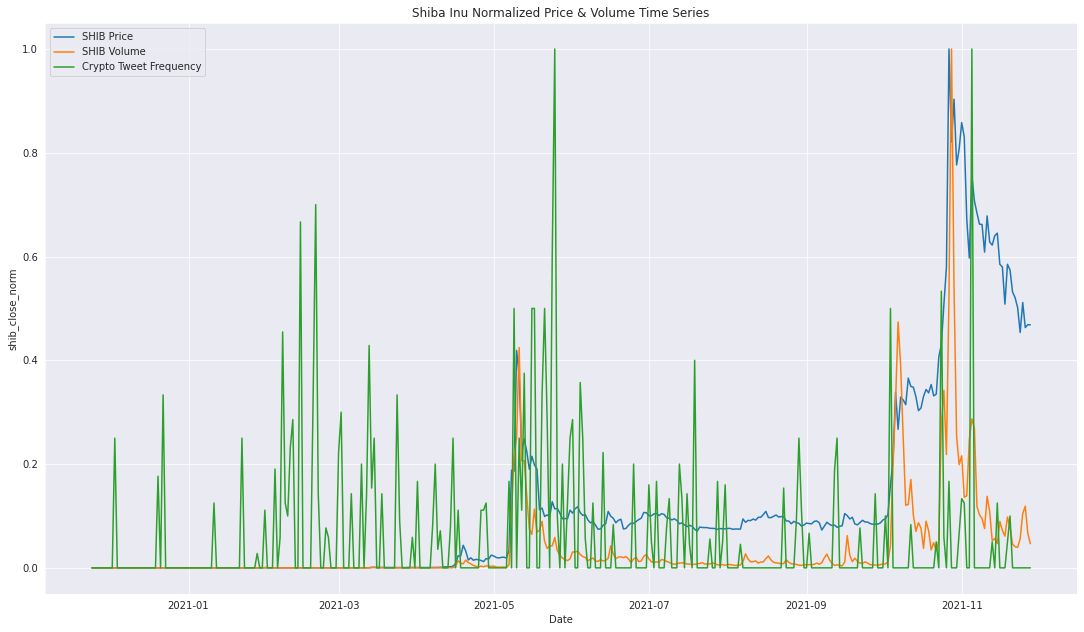

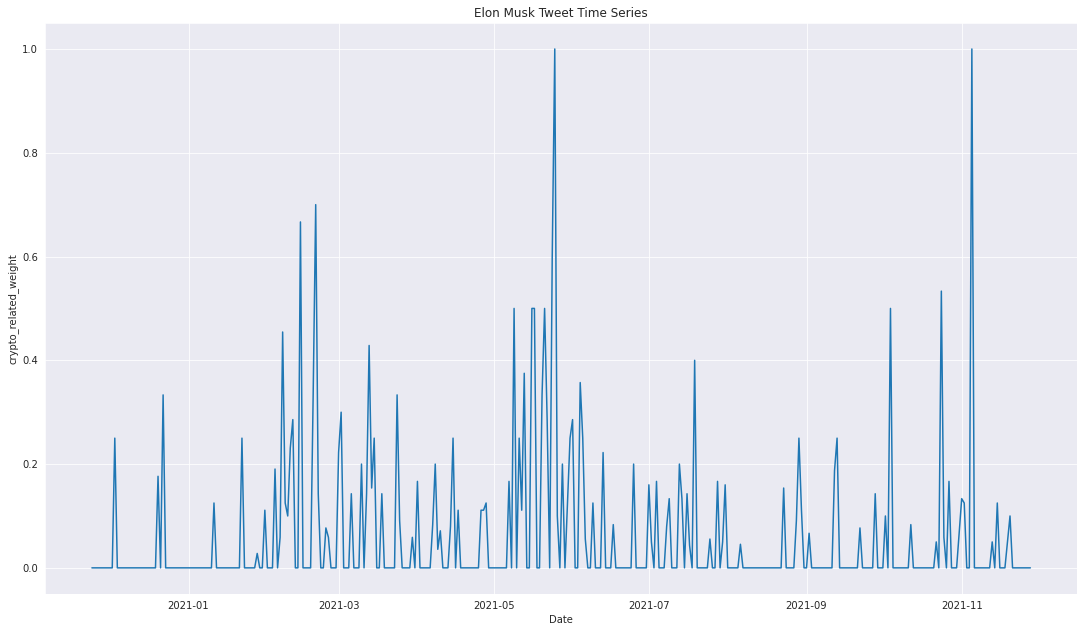

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x='Date',
                             y='shib_close_norm',
                             data=twitter_crypto_data)

# SHIB Normalized Volume
combined_plot = sns.lineplot(x='Date',
                             y='shib_volume_norm',
                             data=twitter_crypto_data)

combined_plot = sns.lineplot(x='Date',
                             y='crypto_related_weight',
                             data=twitter_crypto_data)

# Add vlines of top 10 most frequent dates
#for index in range(top_elon_freqs.shape[0]):
#  plt.axvline(x=top_elon_freqs.index[index],
#              ymin=0,
#              ymax=1,
#              color='red')

plt.title('Shiba Inu Normalized Price & Volume Time Series')

# Generate plot legend

plt.legend(['SHIB Price',
            'SHIB Volume',
            'Crypto Tweet Frequency'])

# Render plot
plt.show()


##### Doge Coin

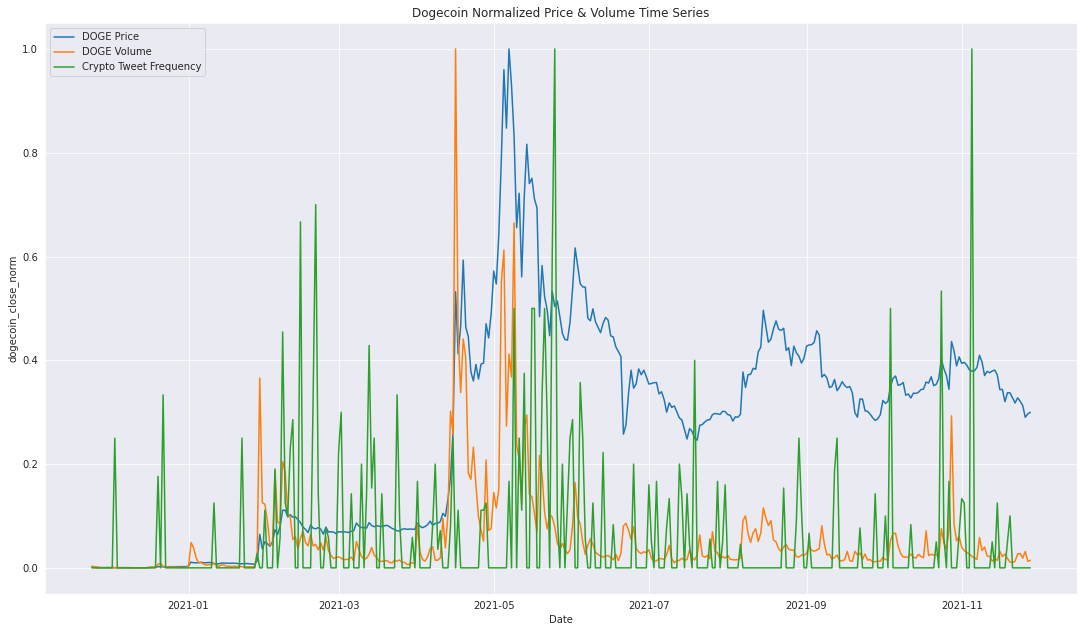

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x='Date',
                             y='dogecoin_close_norm',
                             data=twitter_crypto_data)

# SHIB Normalized Volume
combined_plot = sns.lineplot(x='Date',
                             y='dogecoin_volume_norm',
                             data=twitter_crypto_data)

combined_plot = sns.lineplot(x='Date',
                             y='crypto_related_weight',
                             data=twitter_crypto_data)
  
plt.title('Dogecoin Normalized Price & Volume Time Series')

# Generate plot legend
plt.legend(['DOGE Price',
            'DOGE Volume',
            'Crypto Tweet Frequency'])

# Render plot
plt.show()

##### Ethereum

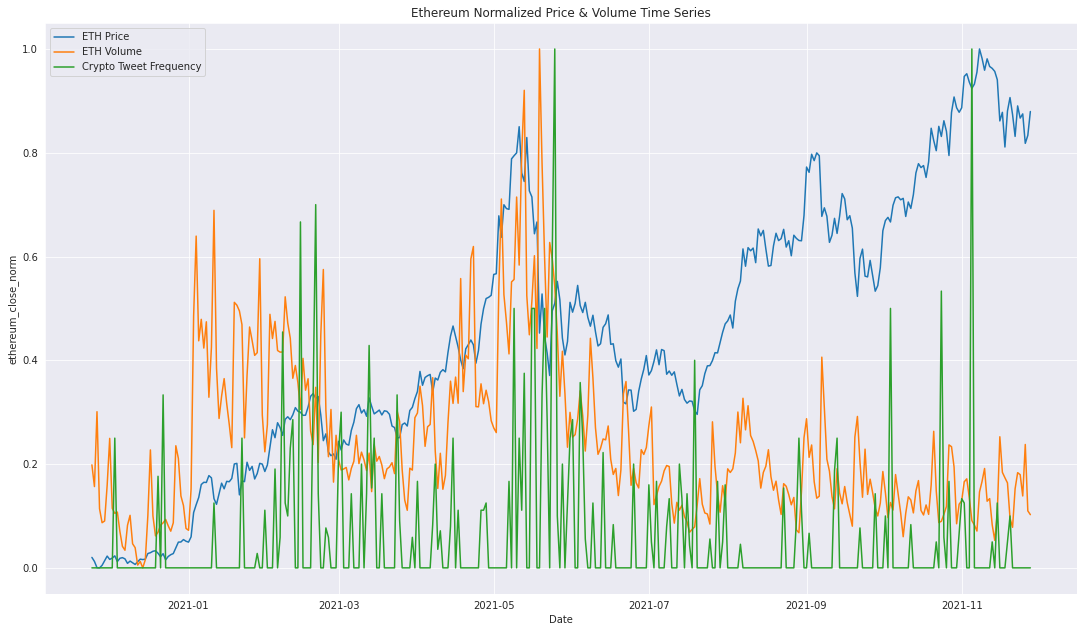

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x='Date',
                             y='ethereum_close_norm',
                             data=twitter_crypto_data)

# SHIB Normalized Volume
combined_plot = sns.lineplot(x='Date',
                             y='ethereum_volume_norm',
                             data=twitter_crypto_data)

# Crypto-Related Tweet from Elon Musk
combined_plot = sns.lineplot(x='Date',
                             y='crypto_related_weight',
                             data=twitter_crypto_data)

 
plt.title('Ethereum Normalized Price & Volume Time Series')

# Generate plot legend
plt.legend(['ETH Price',
            'ETH Volume',
            'Crypto Tweet Frequency'])

# Render plot
plt.show()


##### Bitcoin

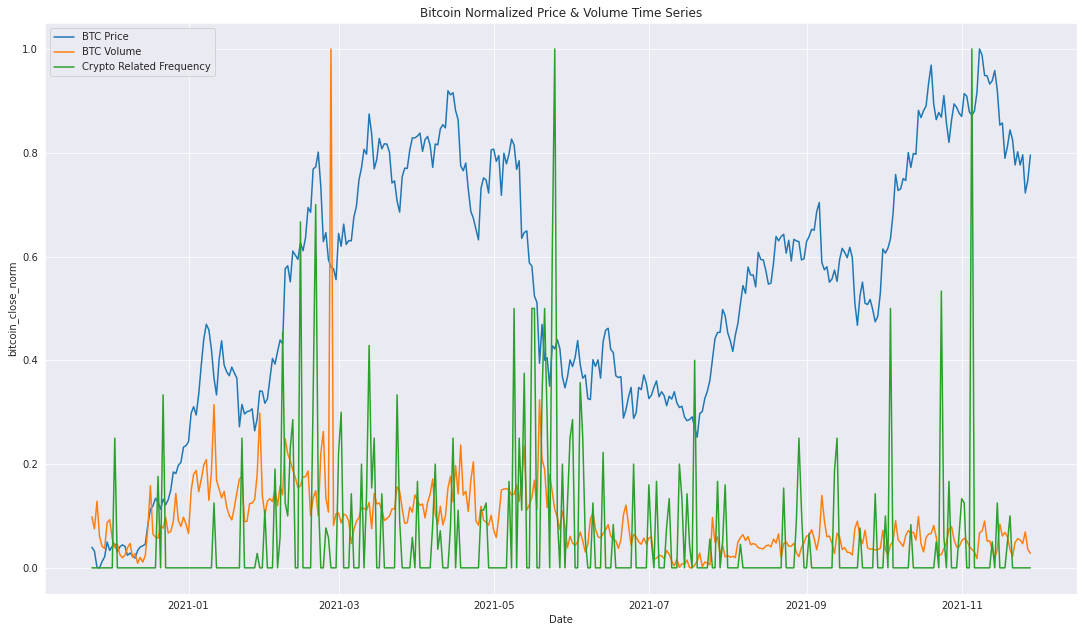

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x='Date',
                             y='bitcoin_close_norm',
                             data=twitter_crypto_data)

# SHIB Normalized Volume
combined_plot = sns.lineplot(x='Date',
                             y='bitcoin_volume_norm',
                             data=twitter_crypto_data)

# Crypto-Related Tweet from Elon Musk
combined_plot = sns.lineplot(x='Date',
                             y='crypto_related_weight',
                             data=twitter_crypto_data)
  
plt.title('Bitcoin Normalized Price & Volume Time Series')

# Generate plot legend
plt.legend(['BTC Price',
            'BTC Volume',
            'Crypto Related Frequency'])

# Render plot
plt.show()


### Evaluate Time Series for Auto-Correlation

Before we can conduct testing of cross-correlation, we must evaluate the presence of auto-correlation and correct for such if it is present. One of the assumptions of cross-correlational assessments is that there is not auto-correlation present. This test will also allow us to deal with any identifiable trends that may impact our cross-correlational results in an adverse way. Recall that both series are dependent on time; thus, if a given cryptocurrency series and the frequency of cryptocurrency tweets grows over time, we would expect these two to have a strong correlation. We want to ensure we are assessing only the impacts that one of the series has on the other and vice versa. 

#### Shiba Inu

##### ADF: Shiba Inu Closing Price

In [4]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['shib_close_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))


ADF Statistic: -0.6123893896171969
p-value: 0.8681578857191483
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


##### 1st Difference: Shiba Inu Closing Price

ADF Statistic: -6.744724
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


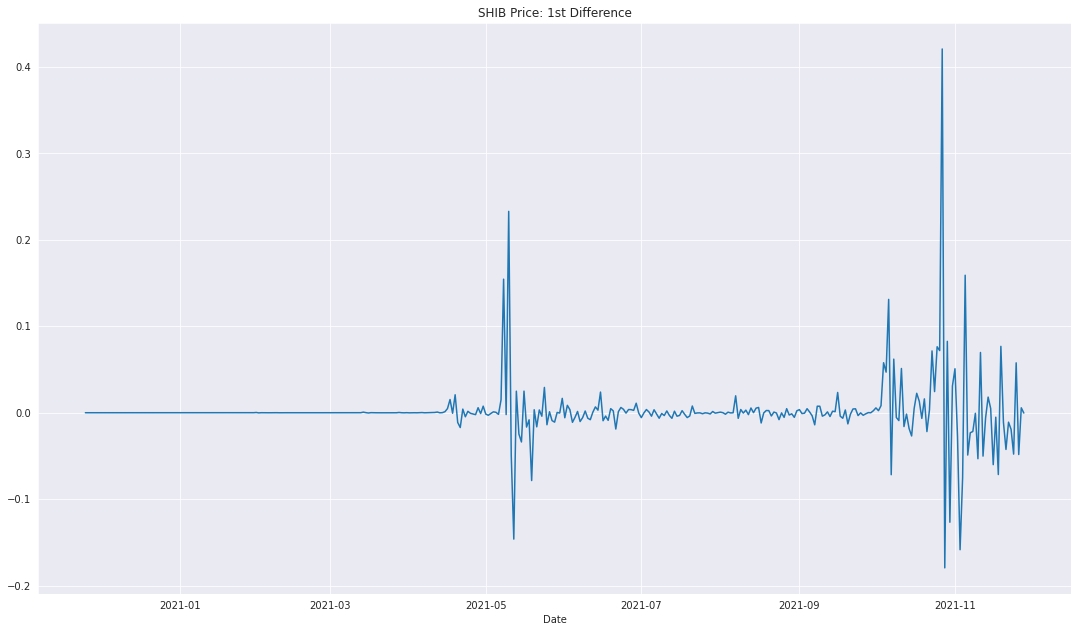

In [5]:
# Take first difference, test significance
X = twitter_crypto_data['shib_close_norm']
X = X.astype('float32')

inverval=1

# difference data
#days_in_year = 365
stationary = difference(X, inverval)
stationary.index = twitter_crypto_data.index[inverval:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('SHIB Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = pd.DataFrame(stationary)
twitter_crypto_data_1df = twitter_crypto_data_1df.rename(columns={0:'shib_close_1df'})

##### ACF & PACF: Shiba Inu Closing Price (1st Difference)

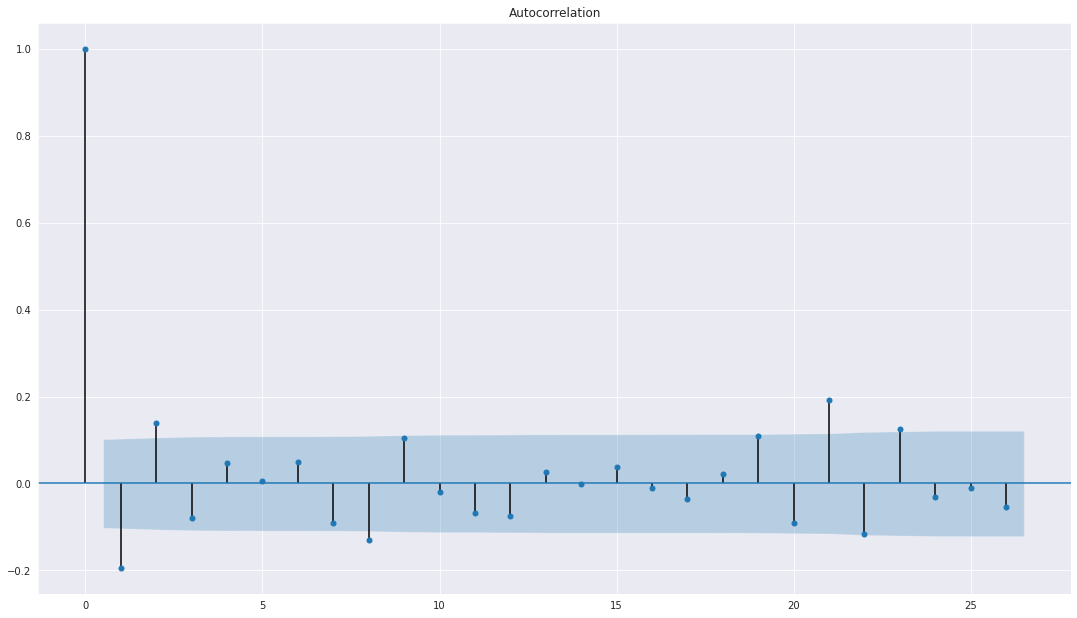

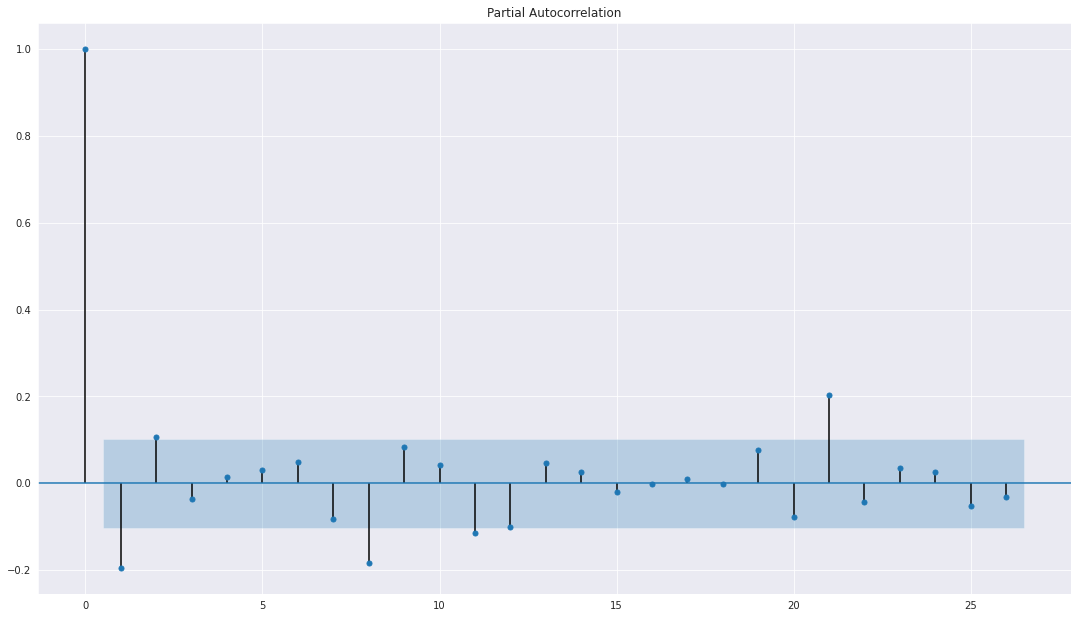

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['shib_close_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['shib_close_1df'])
fig.set_size_inches(18.5, 10.5)

##### ADF: Shiba Inu Volume

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['shib_volume_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.3164871031669945
p-value: 0.00041589897727418437
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


##### ACF & PACF: Shiba Inu Volume

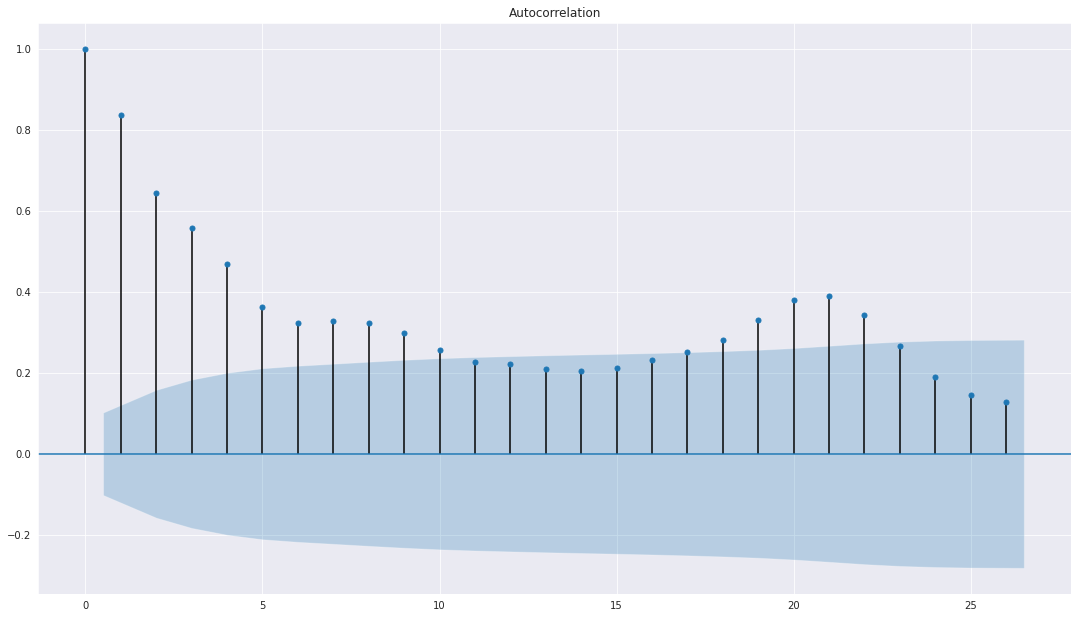

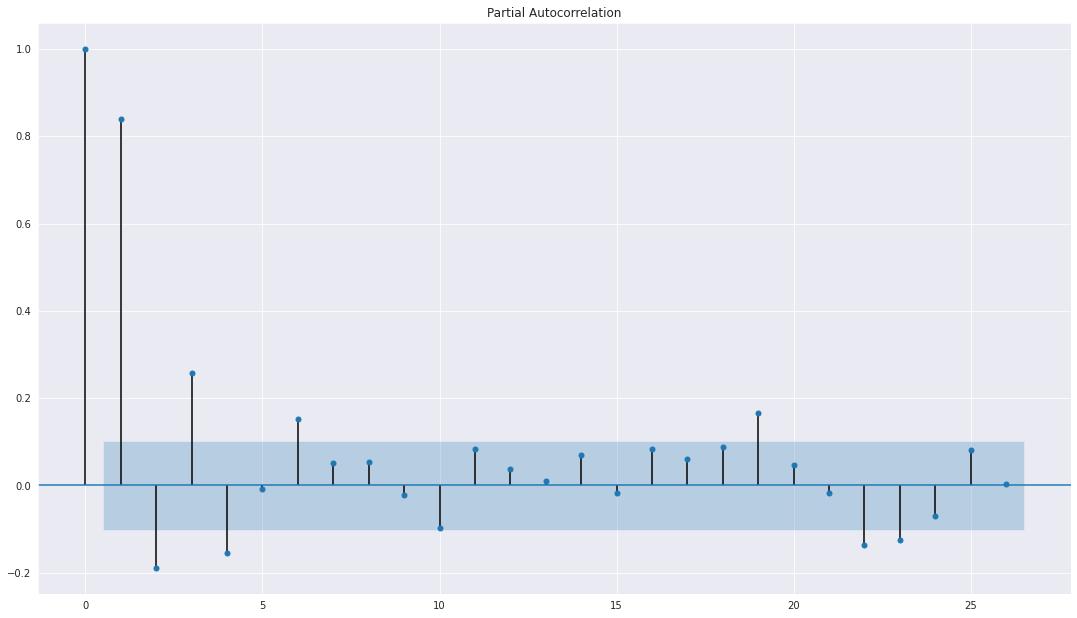

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data['shib_volume'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data['shib_volume'])
fig.set_size_inches(18.5, 10.5)

##### 2nd Difference

ADF Statistic: -8.524372
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


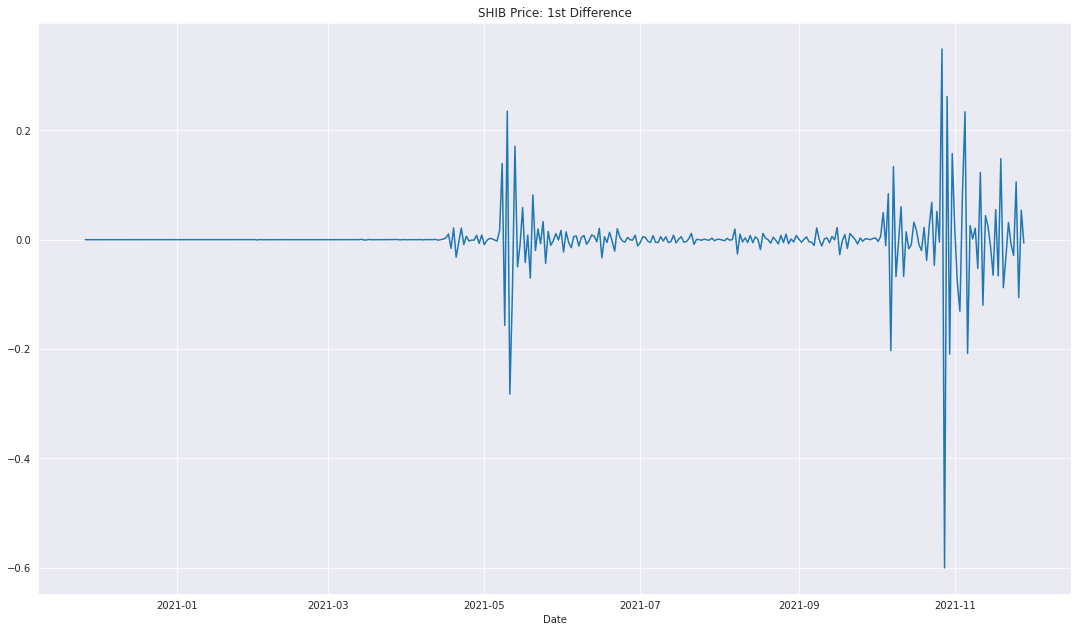

In [ ]:
# Take first difference, test significance
X = twitter_crypto_data_1df['shib_close_1df']
X = X.astype('float32')

inverval=1

# difference data
#days_in_year = 365
stationary = difference(X, inverval)
stationary.index = twitter_crypto_data_1df.index[inverval:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('SHIB Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_2df = pd.DataFrame(stationary)
twitter_crypto_data_2df = twitter_crypto_data_2df.rename(columns={0:'shib_close_2df'})

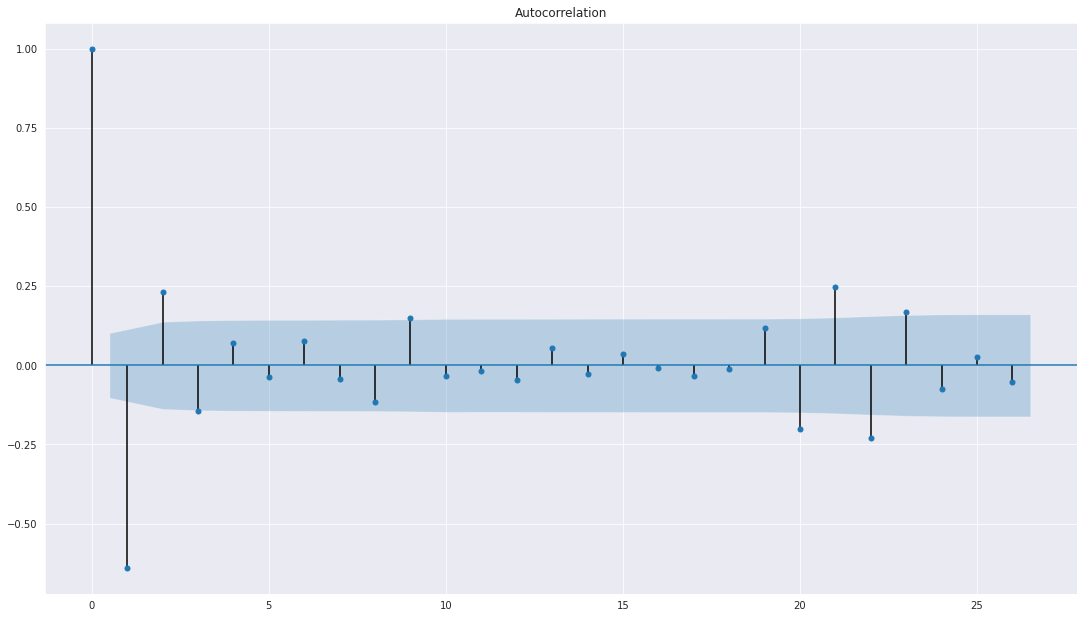

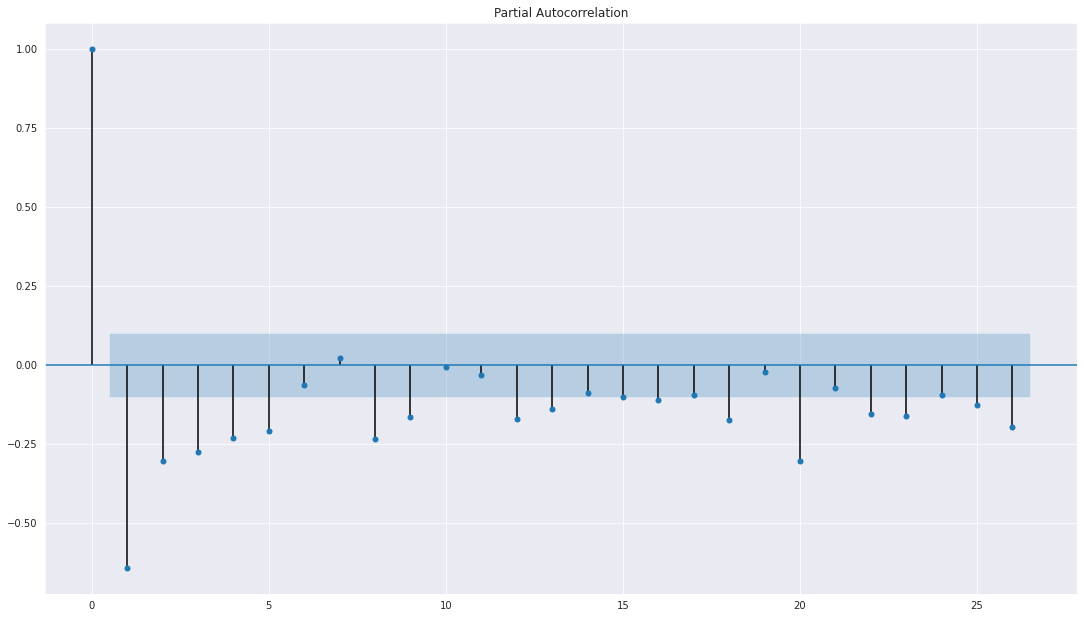

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_2df['shib_close_2df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_2df['shib_close_2df'])
fig.set_size_inches(18.5, 10.5)

#### Dogecoin

##### ADF: Dogecoin Closing Price

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['dogecoin_close_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.6960801755609645
p-value: 0.43313321162884894
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


##### First Difference: Dogecoin Closing Price

ADF Statistic: -6.003021
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


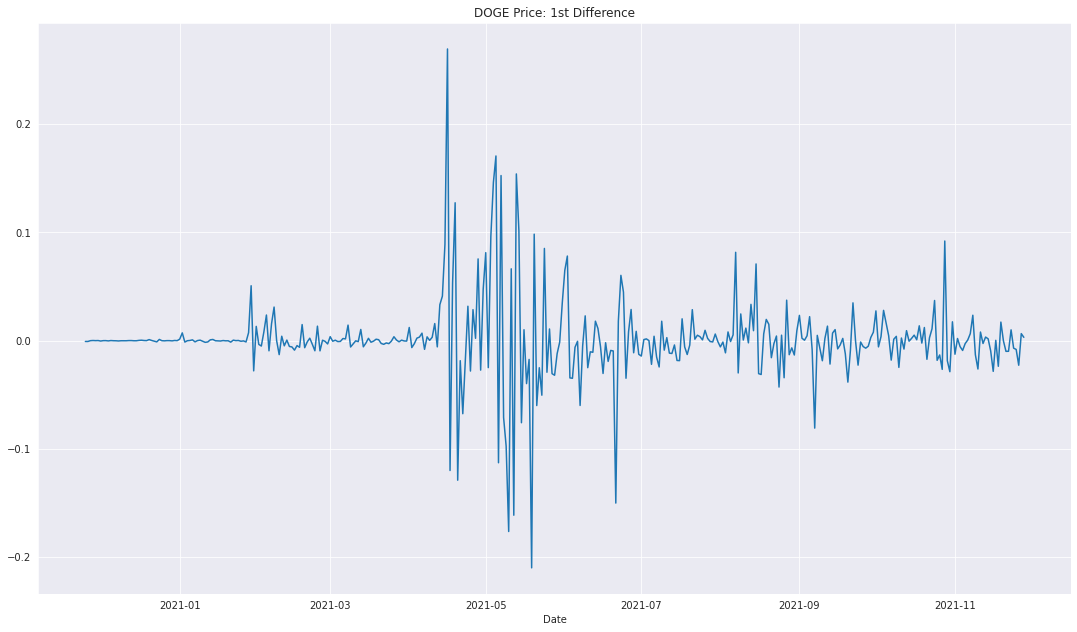

In [6]:
# Take first difference, test significance
X = twitter_crypto_data['dogecoin_close_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('DOGE Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'doge_close_1df'})

##### ACF & PACF: Doge Close Price

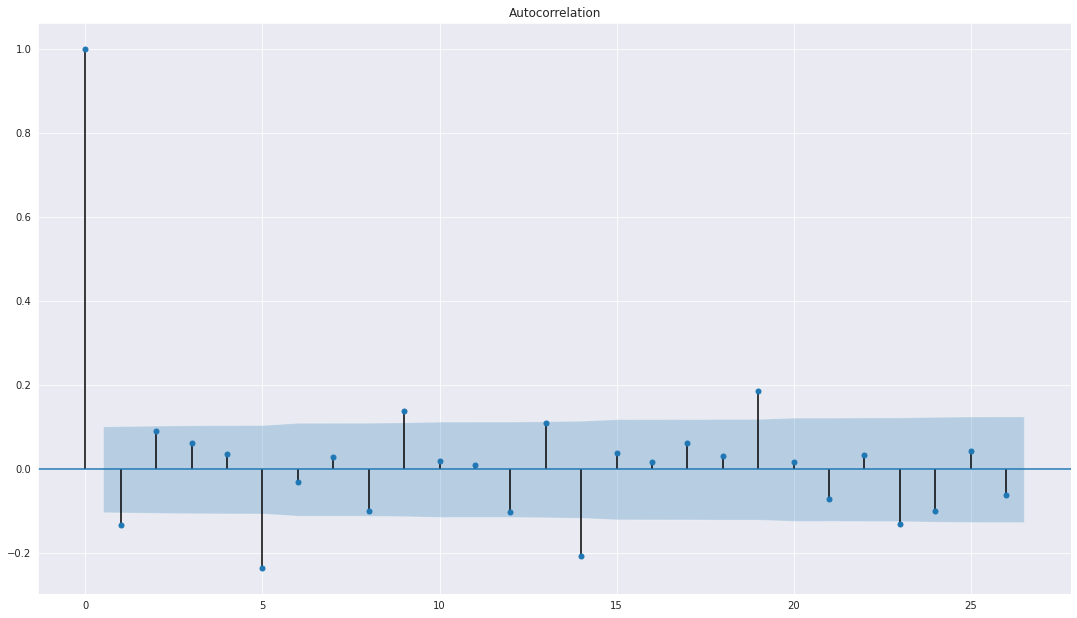

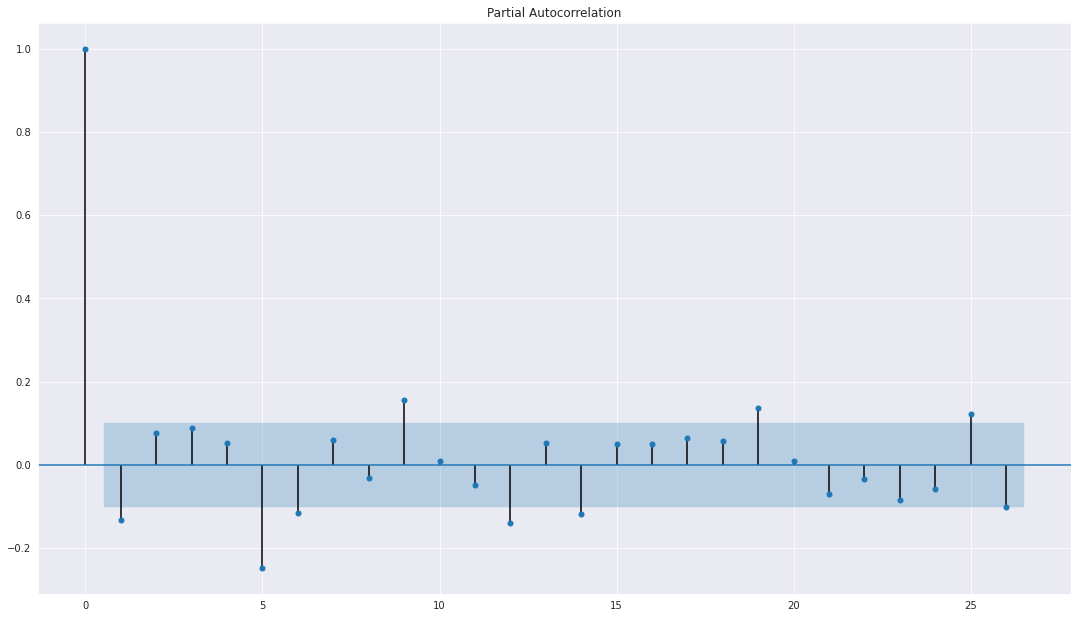

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['doge_close_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['doge_close_1df'])
fig.set_size_inches(18.5, 10.5)

##### ADF: Dogecoin Volume

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['dogecoin_volume_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.047133909462711
p-value: 0.26629629046765657
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


##### 1st Difference: Dogecoin Volume

ADF Statistic: -8.332458
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


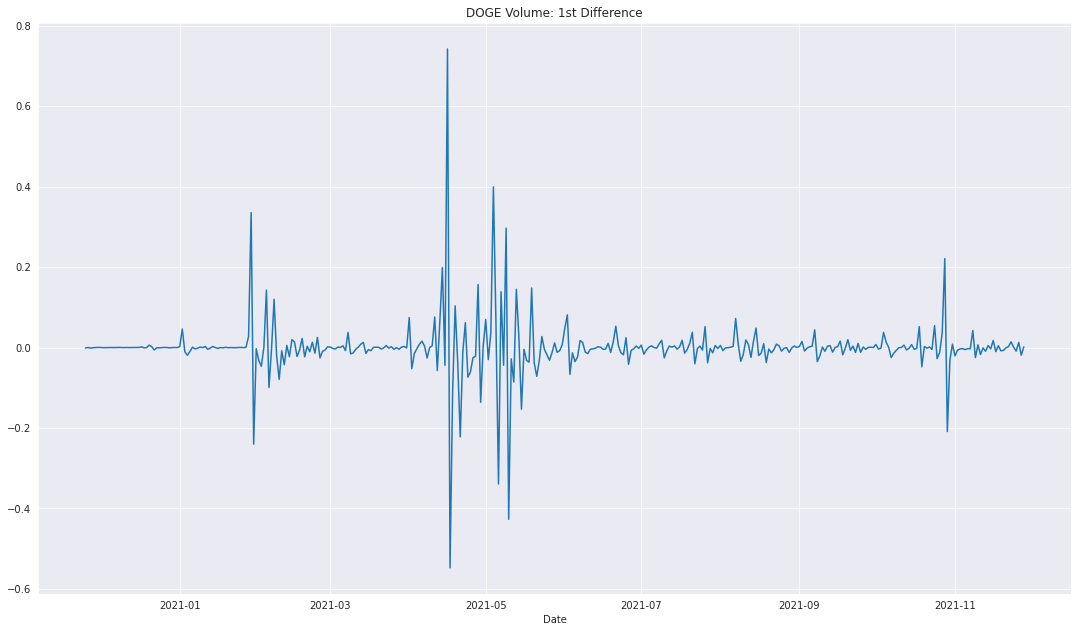

In [7]:
# Take first difference, test significance
X = twitter_crypto_data['dogecoin_volume_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('DOGE Volume: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'doge_volume_1df'})

##### ACF & PACF: Dogecoin Volume (1st Difference)

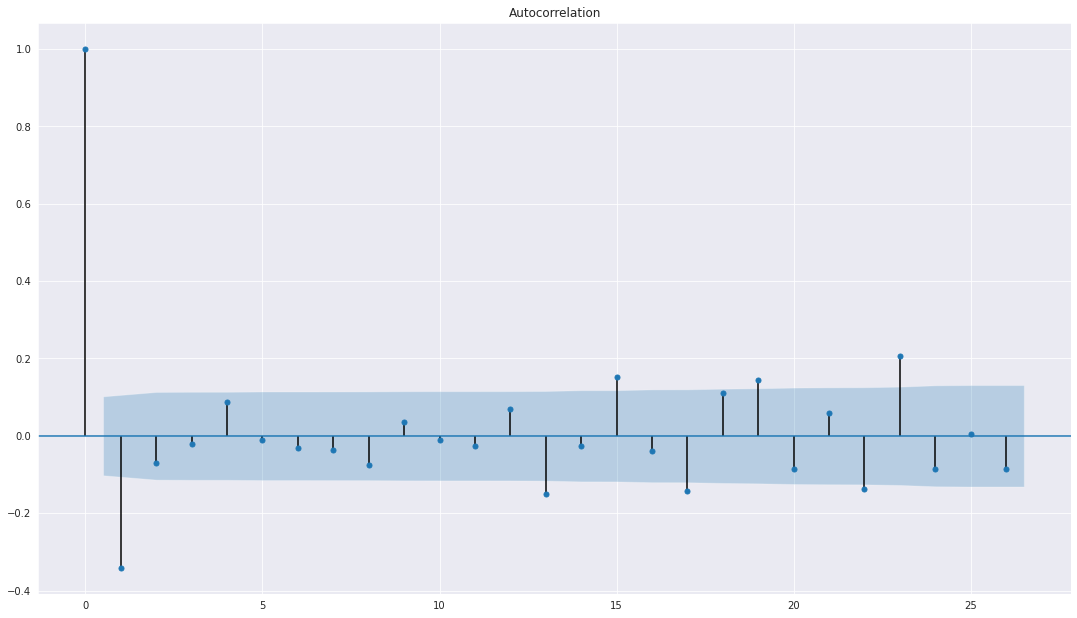

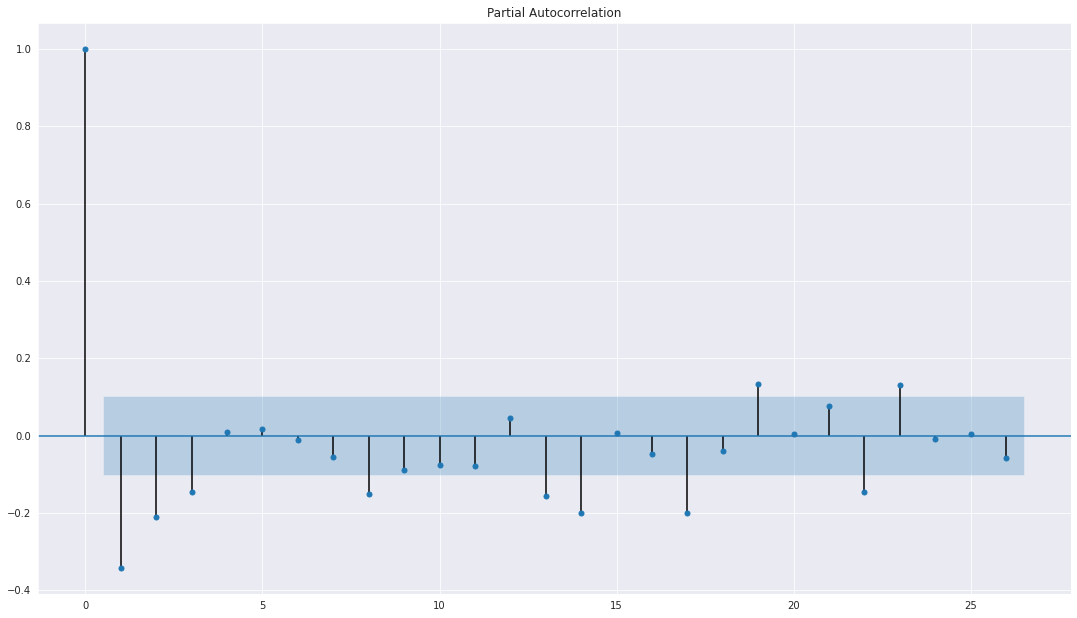

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['doge_volume_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['doge_volume_1df'])
fig.set_size_inches(18.5, 10.5)

#### Ethereum

##### ADF: Ethereum Closing Price

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['ethereum_close_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.0973163113292574
p-value: 0.7161409417112362
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


##### 1st Difference: Ethereum Closing Price

ADF Statistic: -21.844409
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


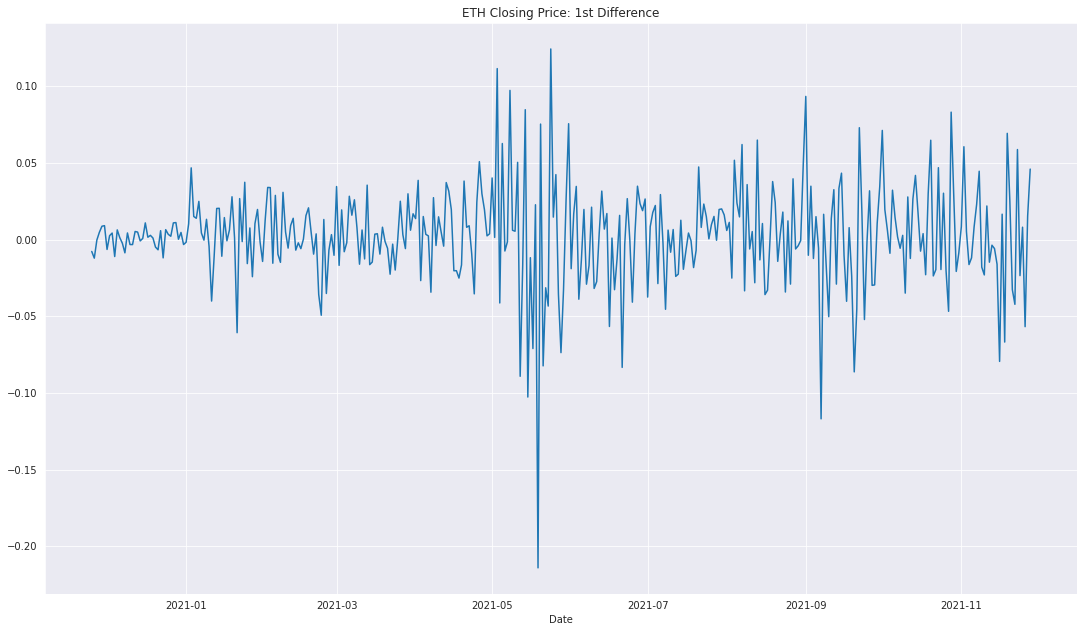

In [8]:
# Take first difference, test significance
X = twitter_crypto_data['ethereum_close_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('ETH Closing Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'ethereum_close_1df'})

##### ACF & PACF: Ethereum Closing Price (1st Difference)

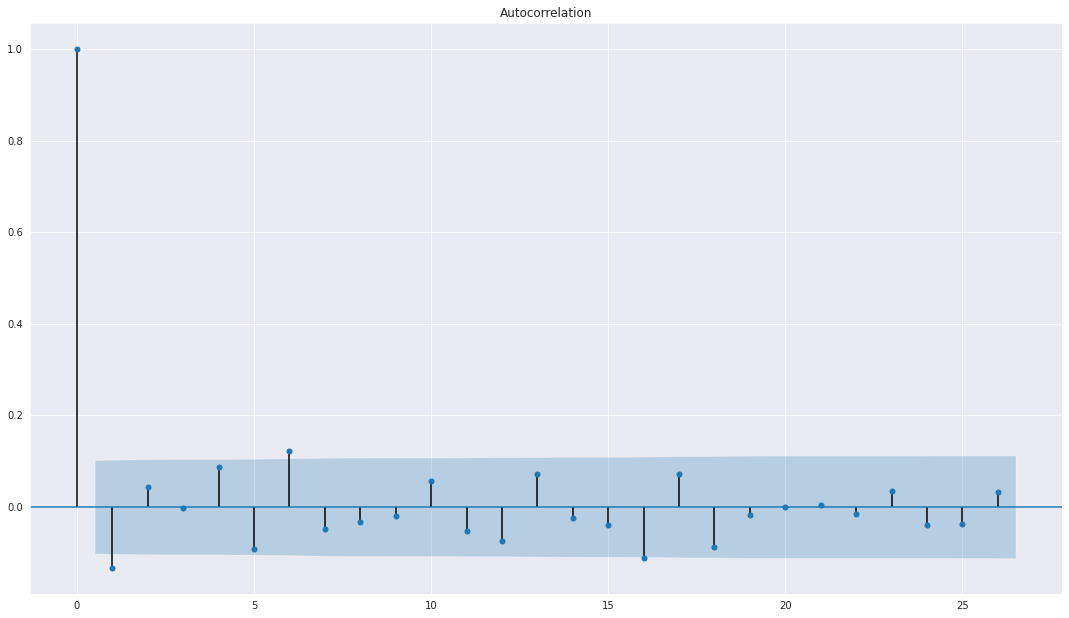

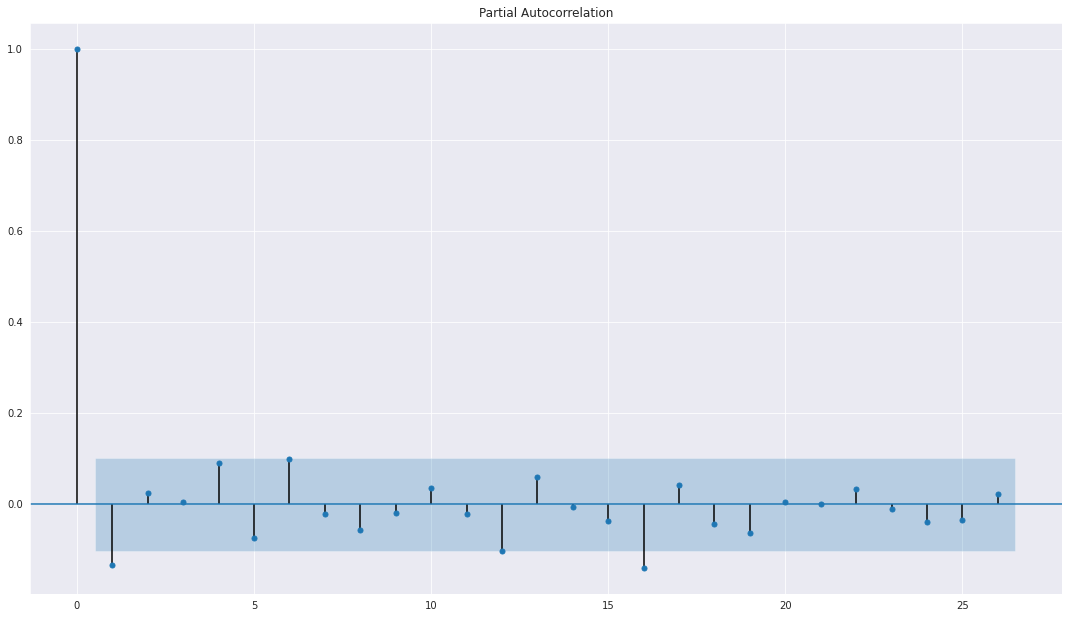

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['ethereum_close_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['ethereum_close_1df'])
fig.set_size_inches(18.5, 10.5)

##### ADF: Ethereum Volume

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['ethereum_volume_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.184261891731578
p-value: 0.2120069856425516
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


##### 1st Difference: Ethereum Volume

ADF Statistic: -12.511054
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


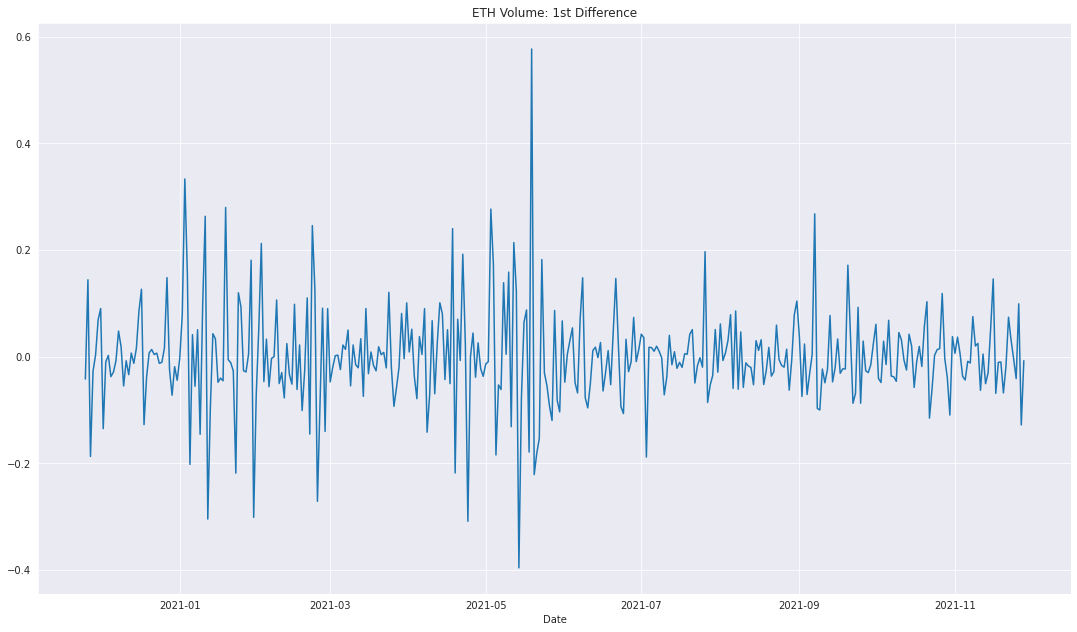

In [9]:
# Take first difference, test significance
X = twitter_crypto_data['ethereum_volume_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('ETH Volume: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'ethereum_volume_1df'})

##### ACF & PACF: Ethereum Volume (1st Difference)

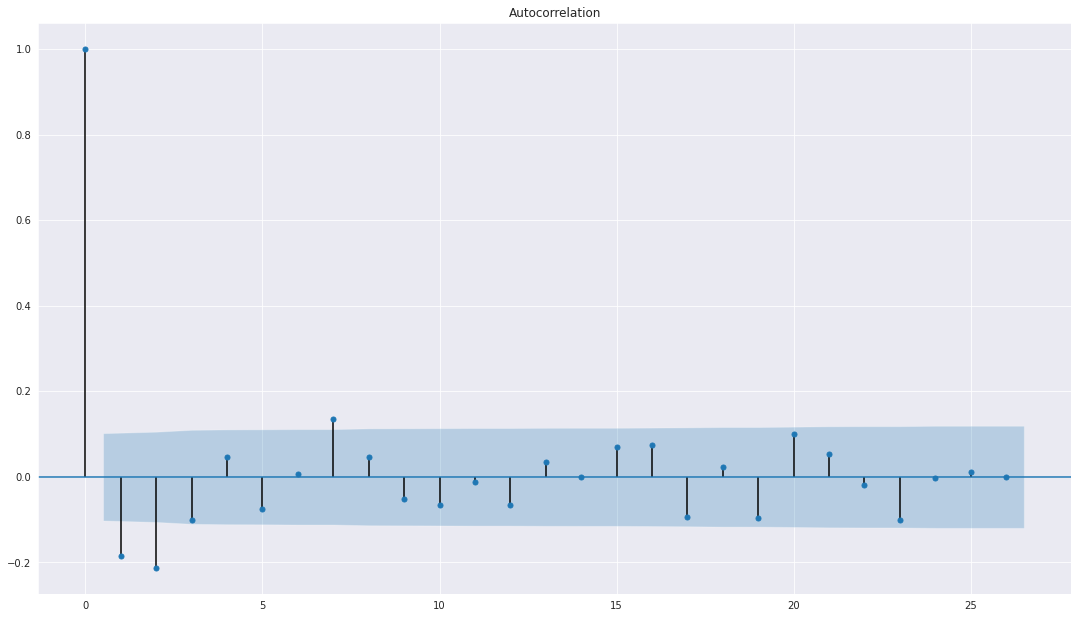

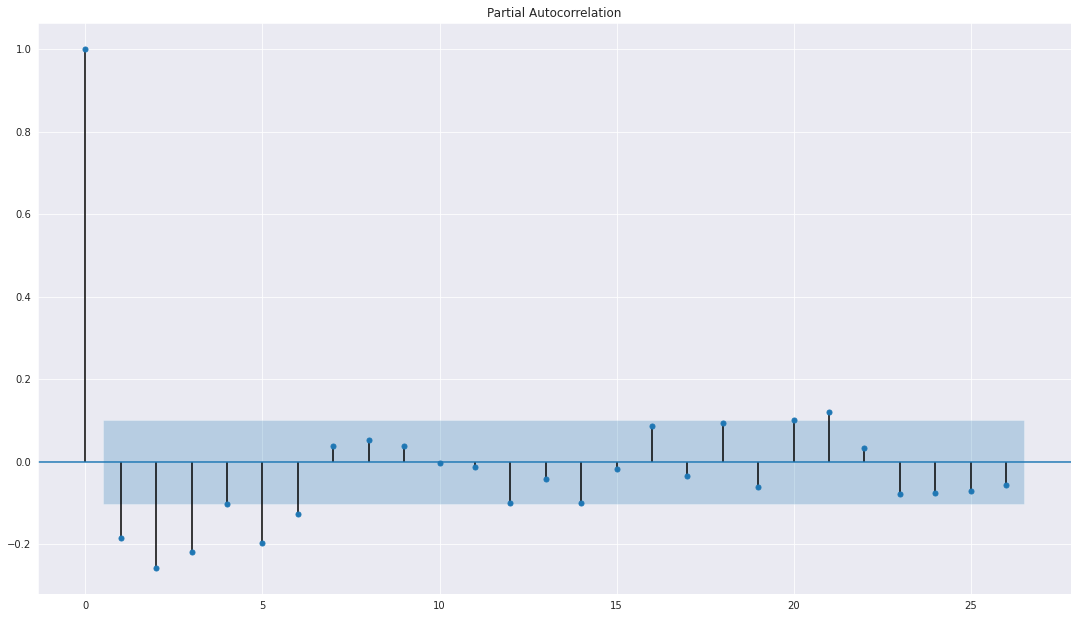

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['ethereum_volume_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['ethereum_volume_1df'])
fig.set_size_inches(18.5, 10.5)

#### Bitcoin

##### ADF: Bitcoin Closing Price

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['bitcoin_close_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.974792896347107
p-value: 0.29773371016536165
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


##### 1st Difference: Bitcoin Closing Price

ADF Statistic: -20.160716
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


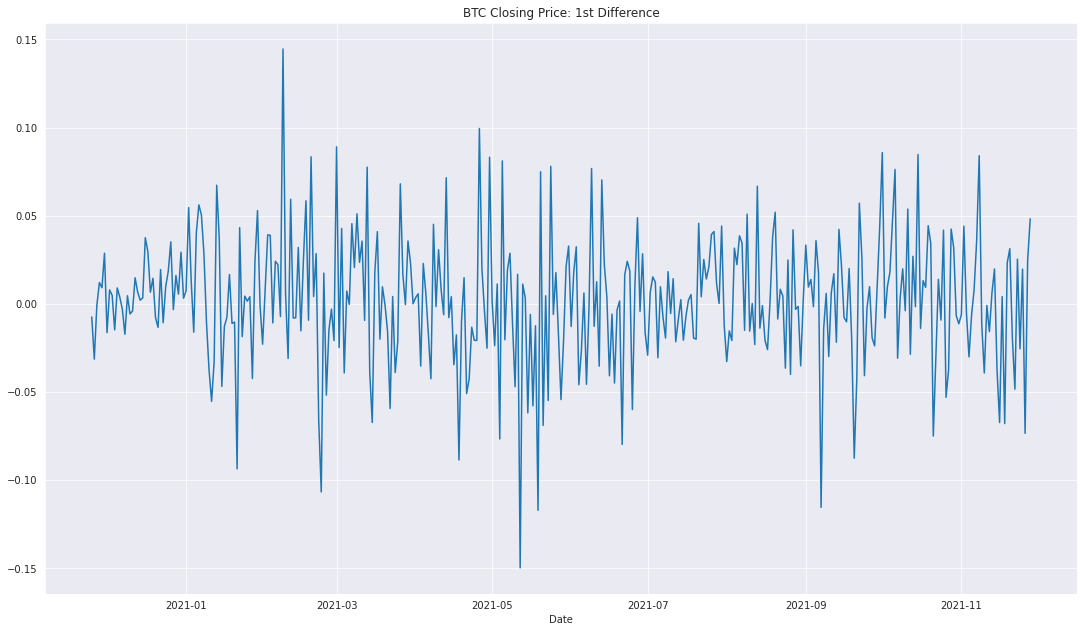

In [10]:
# Take first difference, test significance
X = twitter_crypto_data['bitcoin_close_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('BTC Closing Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'bitcoin_close_1df'})

##### ACF & PACF: Bitcoin Closing Price (1st Difference)

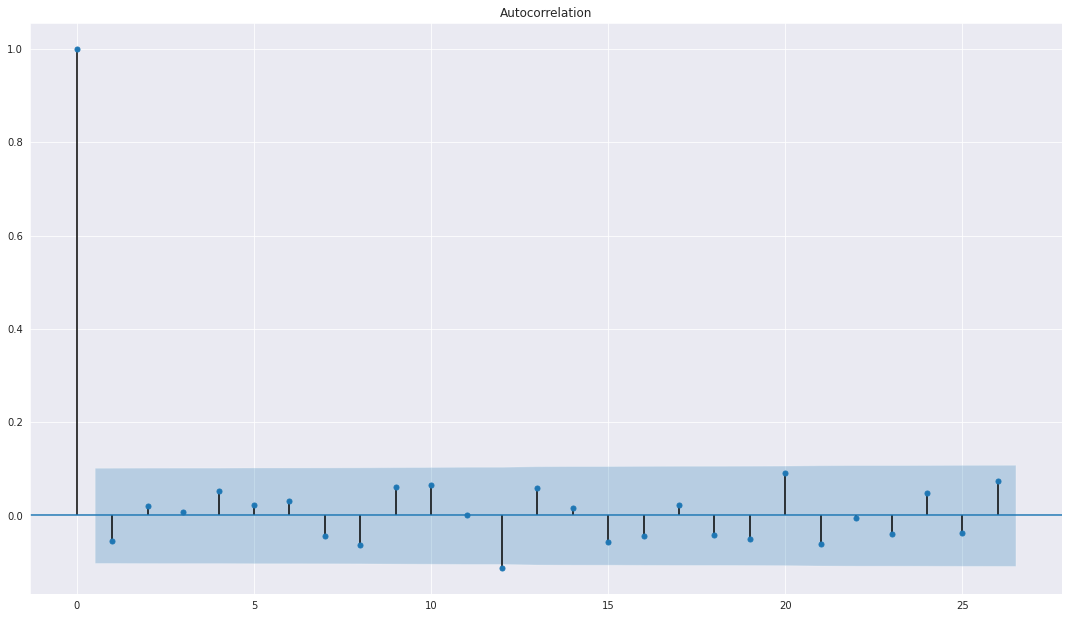

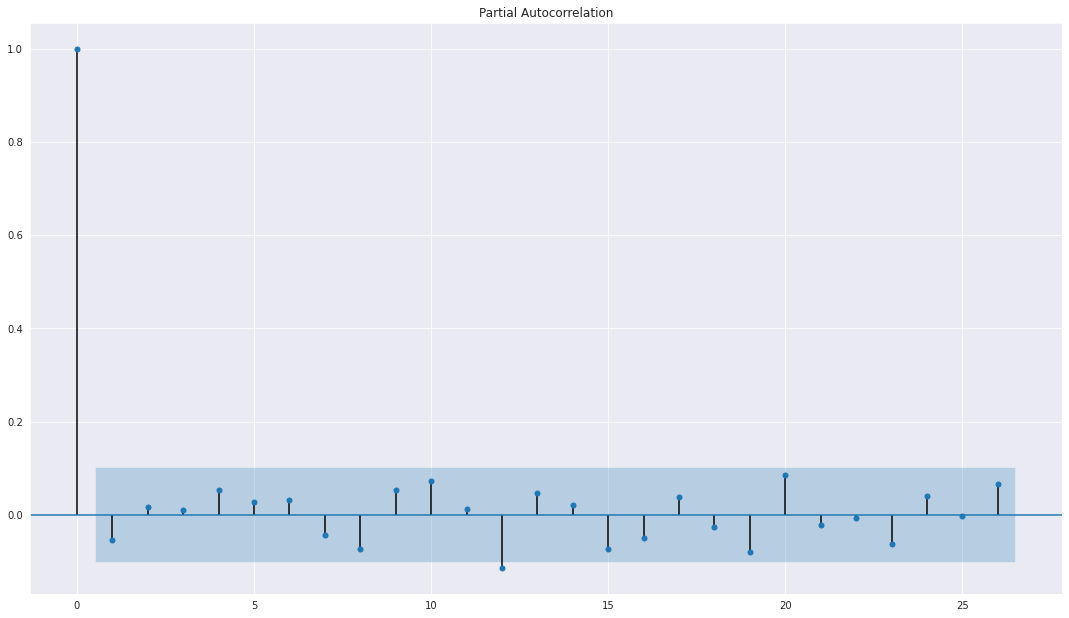

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data_1df['bitcoin_close_1df'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data_1df['bitcoin_close_1df'])
fig.set_size_inches(18.5, 10.5)

##### ADF: Bitcoin Volume

In [ ]:
# Explore whether time series is stationary or not
result = adfuller(twitter_crypto_data['bitcoin_volume_norm'], autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.0801354965631096
p-value: 0.028058605865931868
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


##### 1st Difference: Bitcoin Volume

ADF Statistic: -12.157741
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


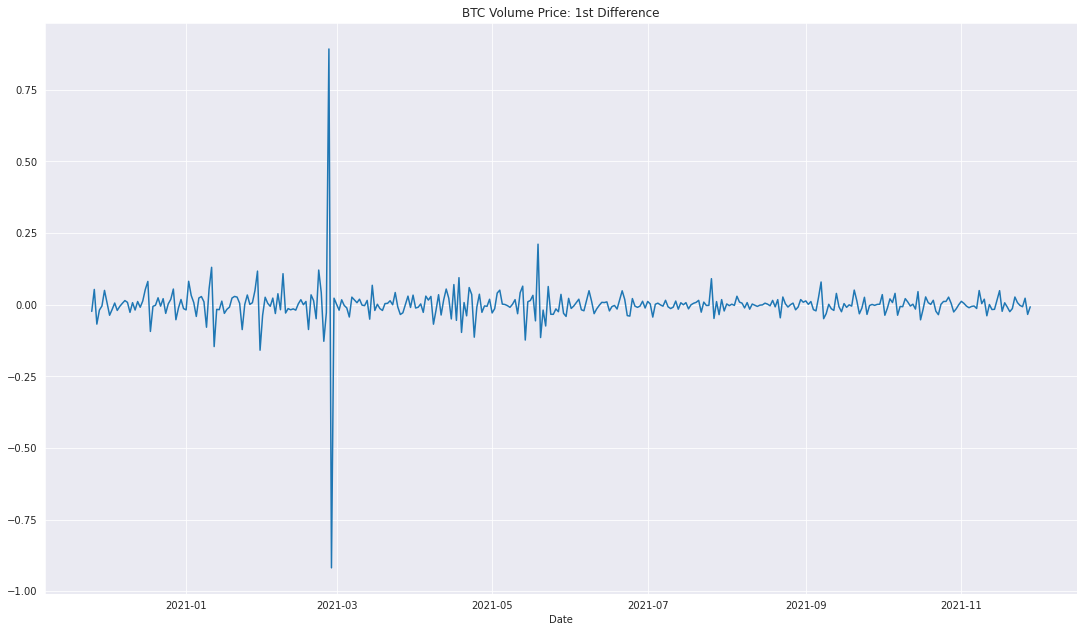

In [11]:
# Take first difference, test significance
X = twitter_crypto_data['bitcoin_volume_norm']
X = X.astype('float32')
# difference data
#days_in_year = 365
stationary = difference(X)
stationary.index = twitter_crypto_data.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

## Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Crypto-Related Tweet from Elon Musk
adf_plot = sns.lineplot(data=stationary)

plt.title('BTC Volume Price: 1st Difference')

# Render plot
plt.show()

# Resulting Dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(pd.DataFrame(stationary),
                                                        how='left',
                                                        on='Date').rename(columns={0:'bitcoin_volume_1df'})

##### ACF & PACF: Bitcoin Volume

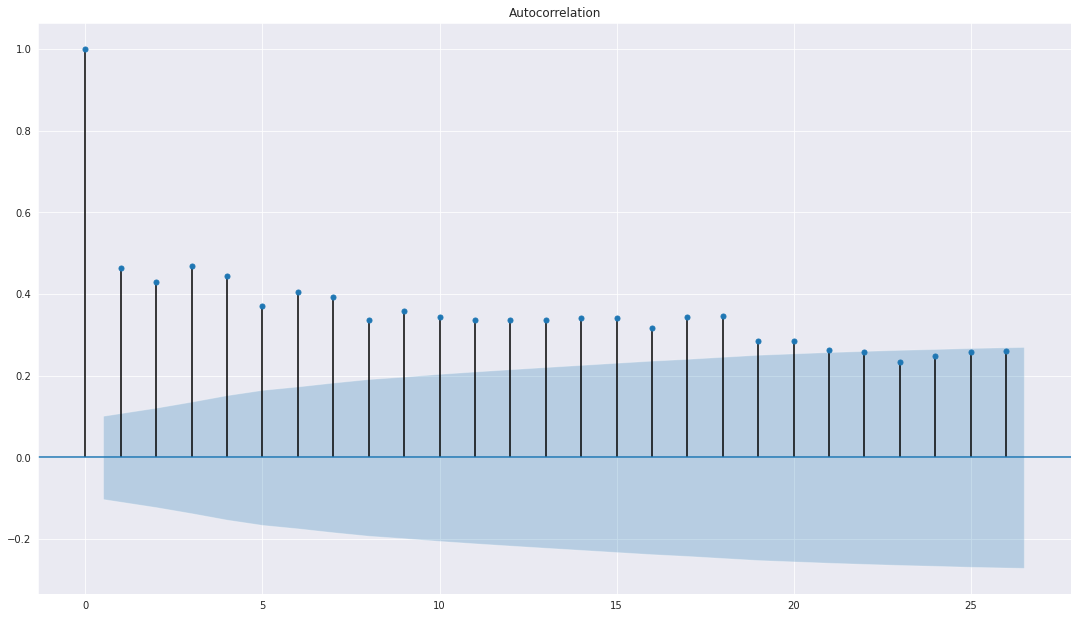

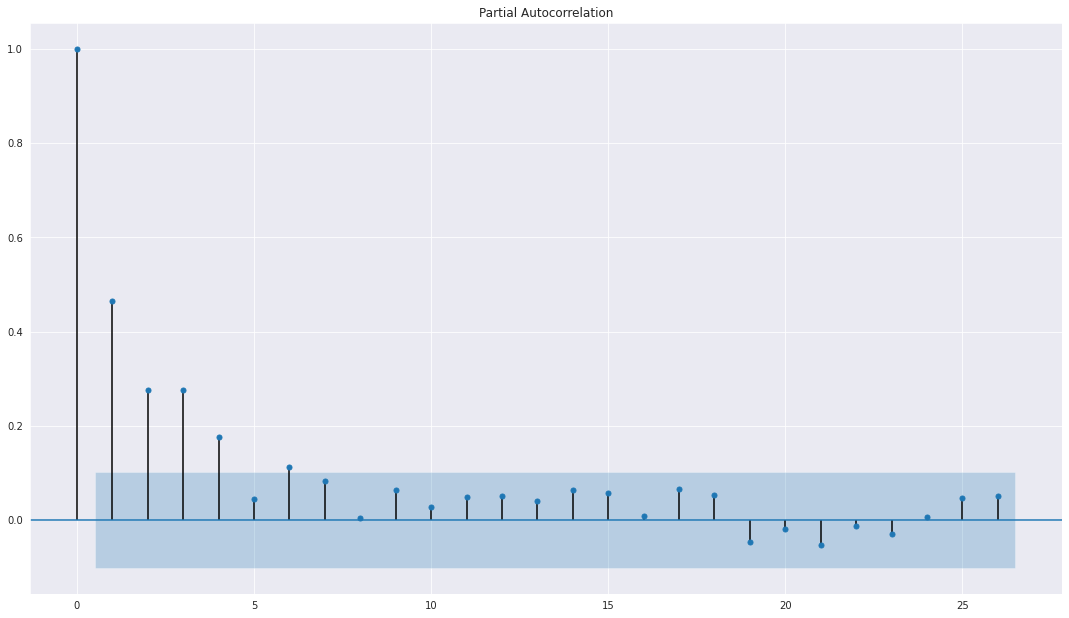

In [ ]:
## Evaluate difference for any remaining auto-correlation present

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_acf(twitter_crypto_data['bitcoin_volume_norm'])
fig.set_size_inches(18.5, 10.5)

plt.show()

# Auto-Correlation
## Enlarge plot
sns.set_style("darkgrid")

fig = plot_pacf(twitter_crypto_data['bitcoin_volume_norm'])
fig.set_size_inches(18.5, 10.5)

### Cross-Correlational Plotting

We want to know whether there is correlation between a crypto-related tweet from Elon and price movement in each coin. To answer this question we need to take both closing and volume into account. *Volume* reflects changes in market trade behavior, which in return impacts price of securities.<br> 

This methodology allows us to explore how well 1 series predicts for the other. The negative lags indicate when the series are shifted (that is, the latter now is evaluated for predicting for the prior). We are looking for the following traits:
- Direction: A negative lag value associated with the highest correlation indicates that the first time series (X we'll say) leads the second time series (Y)
  - A positive lag value can be interpreted as X *lagging* Y
- Which lag has the highest correlation between the two series
  - If the first series indeed impacts the second, the two are expected to be positively correlated
- The lag indicates the observed offset between the two series; the farther they are from zero, the more of a delay of impact can be seen as the leading series changes
  - If a given coin and crypto-related tweet events are correlated, we'd expect a smaller lag, as well as stronger correlation towards the center of our correlogram
  - Note: As the lag increase, it becomes more difficult to interpret cross-correlation as the number of aligning observations diminish
- Positive correlation reflects when the two series are *in phase* with one another, negative reflects when the two are *out of phase* (peaks aline with troughs that is)


Take note that cross-correlation assumes there's no presence of auto-correlation, so the first difference has been taken for signals which indicated signs of auto-correlation.

##### Shiba Inu: Crypto Tweets

###### Volume Results

In [12]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data['crypto_related_weight'], twitter_crypto_data['shib_volume_norm'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: -156
Max Cross-Correlation: 0.3545609496630577
Significance Threshold Results: Significant


In [ ]:
significance_threshold

0.12803687993289598

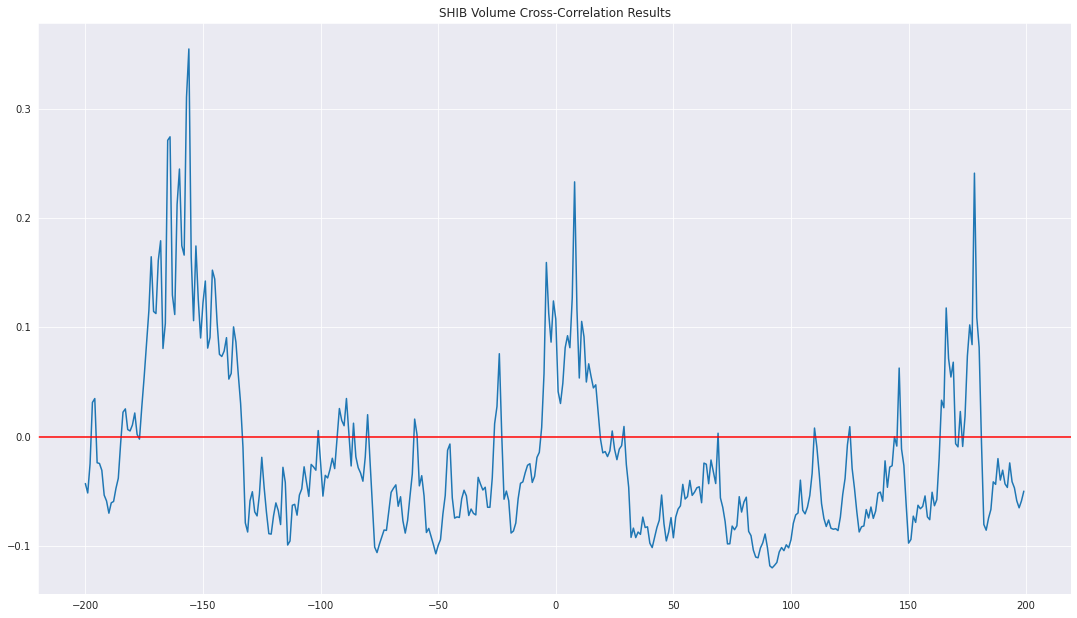

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Volume Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [ ]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['shib_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Closing Price)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Closing Price)
Lag: 179
Max Cross-Correlation: 0.3611275262355196
Significance Threshold Results: Significant


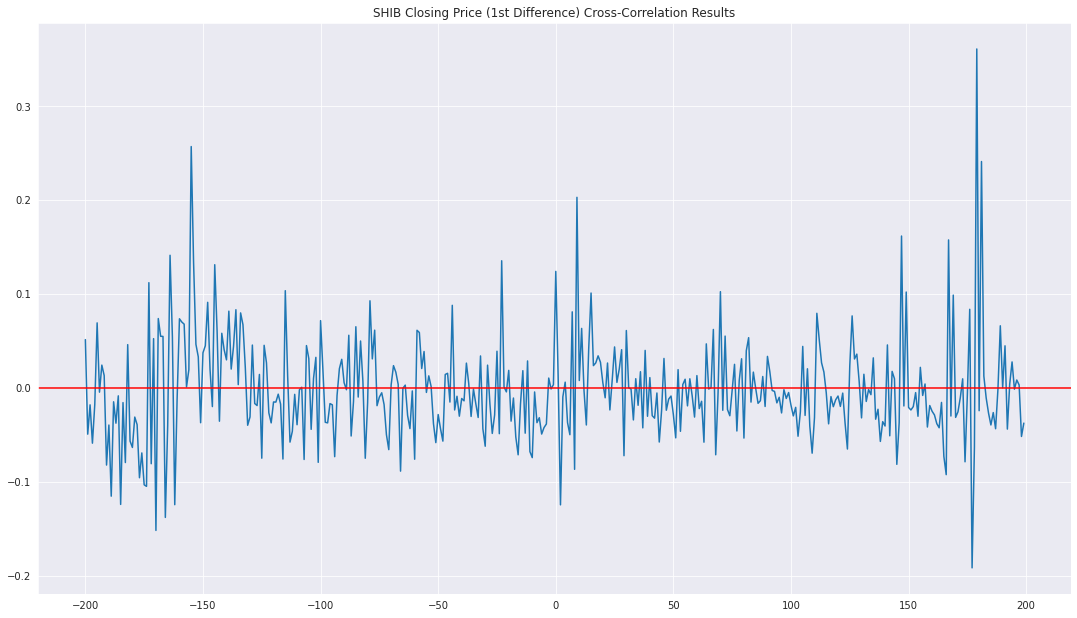

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Shiba Inu: Ethereum

###### Volume Results

In [13]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['ethereum_volume_1df'], twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'shib_volume_norm'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: -178
Max Cross-Correlation: 0.1417523292371197
Significance Threshold Results: Significant


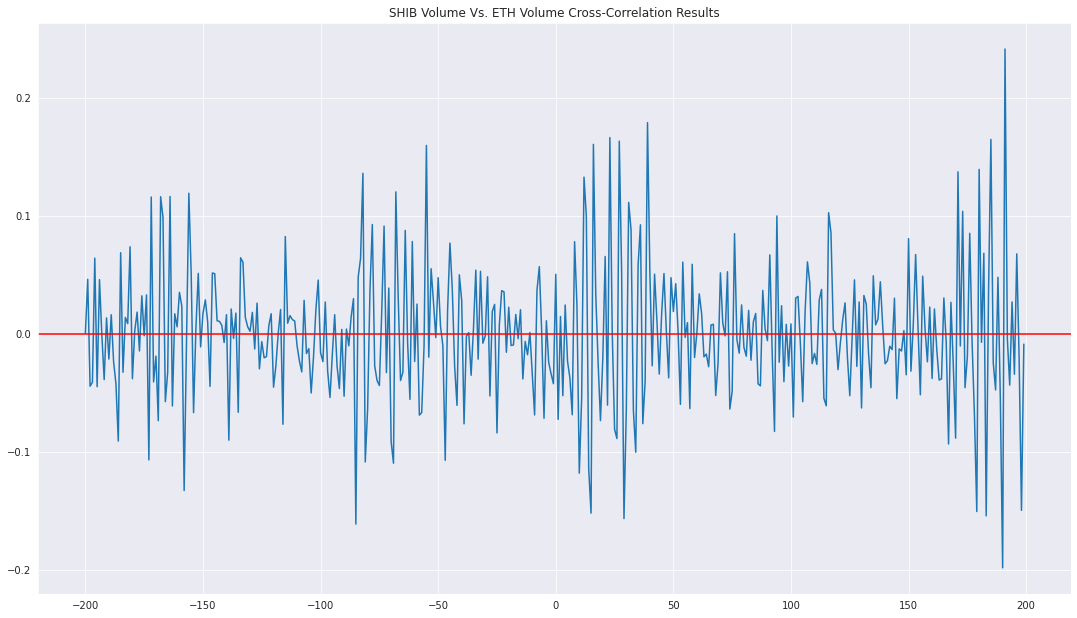

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Volume Vs. ETH Volume Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [14]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['ethereum_close_1df'], twitter_crypto_data_1df['shib_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: -175
Max Cross-Correlation: 0.2751643358436625
Significance Threshold Results: Significant


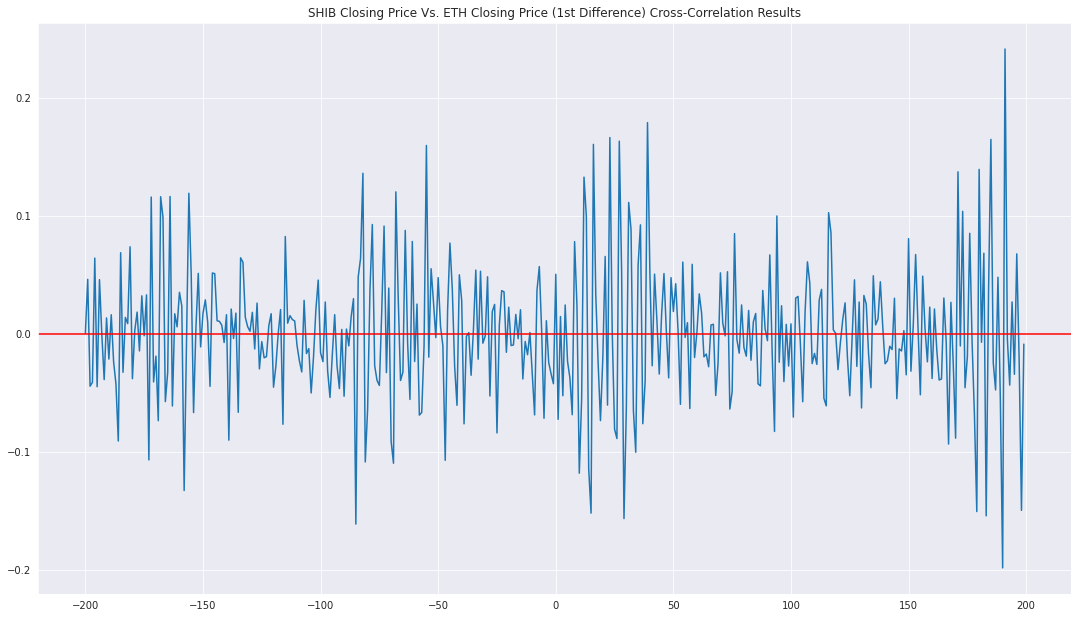

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Closing Price Vs. ETH Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Shiba Inu: Bitcoin

###### Volume Results

In [15]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data['bitcoin_volume_norm'], twitter_crypto_data['shib_volume_norm'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 183
Max Cross-Correlation: 0.12597058295714605
Significance Threshold Results: Not Significant


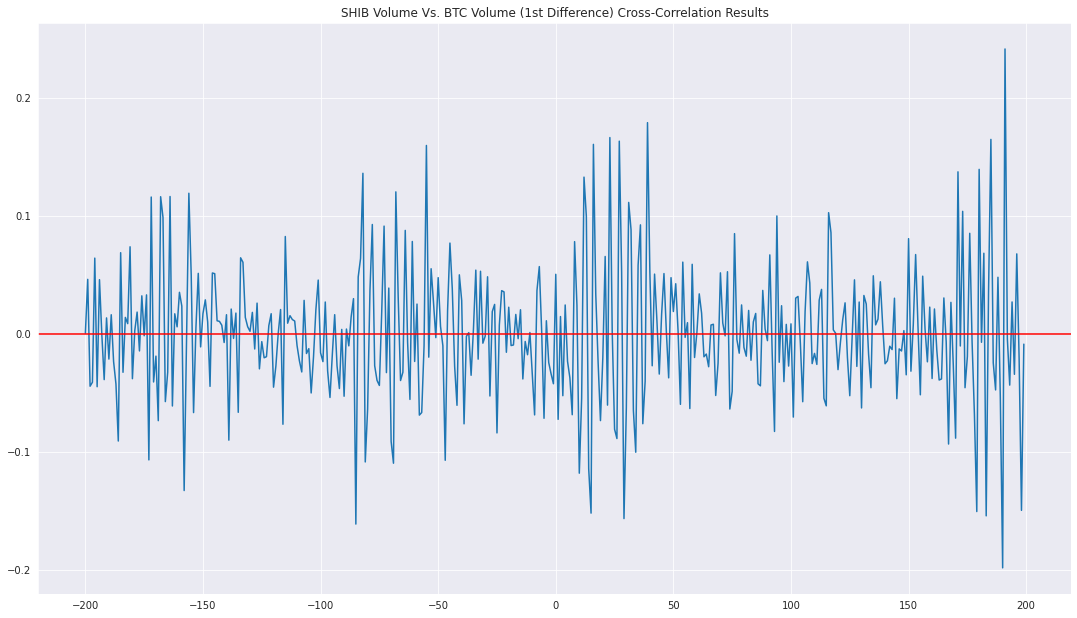

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Volume Vs. BTC Volume (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [16]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['bitcoin_close_1df'], twitter_crypto_data_1df['shib_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: -175
Max Cross-Correlation: 0.21439667154025738
Significance Threshold Results: Significant


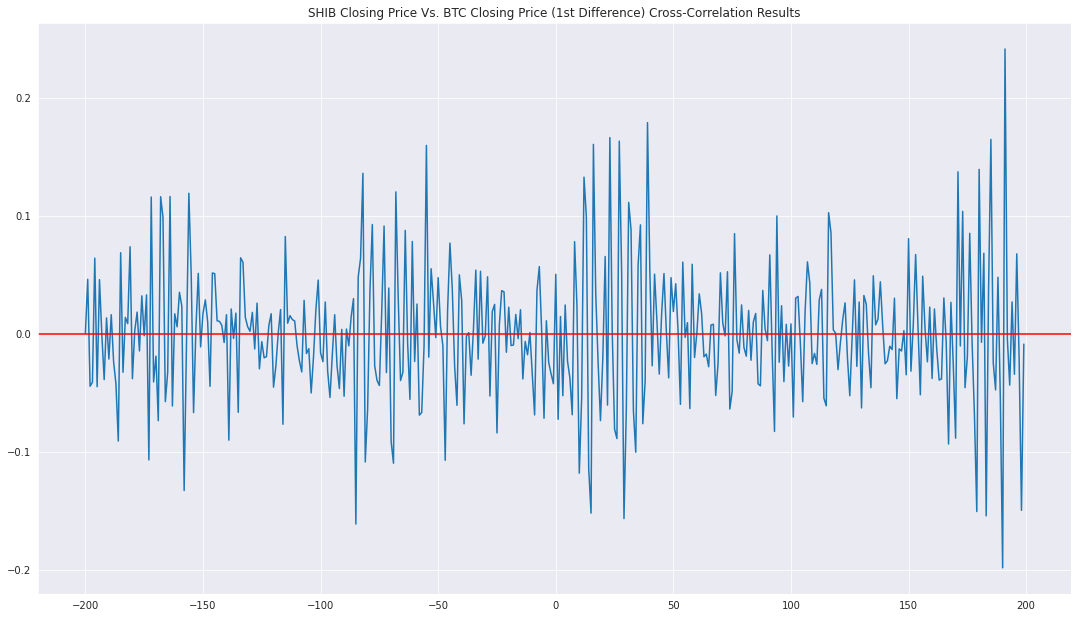

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('SHIB Closing Price Vs. BTC Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Dogecoin: Crypto Tweets

###### Volume Results

In [17]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['doge_volume_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))


Cross-Correlation Results (Volume)
Lag: 191
Max Cross-Correlation: 0.24122238430913942
Significance Threshold Results: Significant


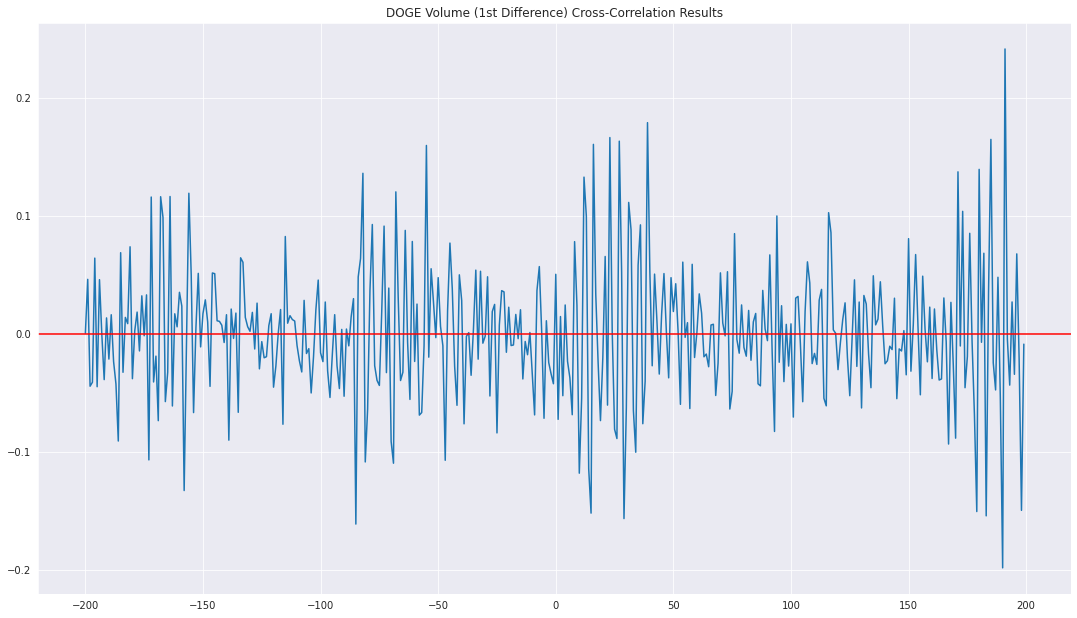

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Volume (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [18]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['doge_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Closing Price)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Closing Price)
Lag: 191
Max Cross-Correlation: 0.2059355433629208
Significance Threshold Results: Significant


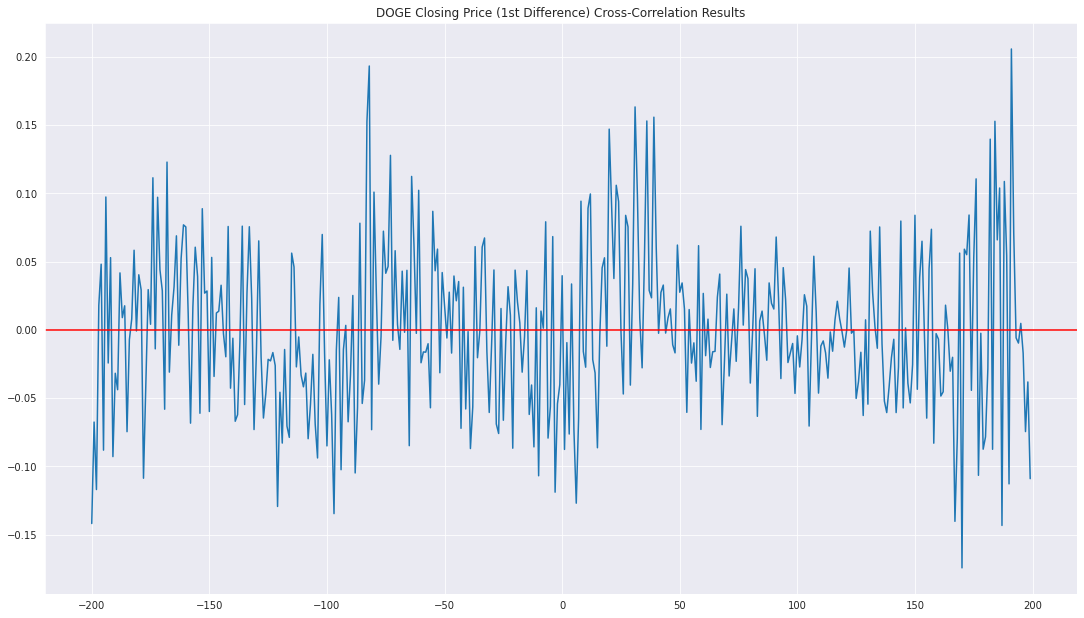

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Dogecoin: Ethereum

###### Volume Results

In [ ]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['ethereum_volume_1df'], twitter_crypto_data_1df['doge_volume_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 33
Max Cross-Correlation: 0.21363613289121974
Significance Threshold Results: Significant


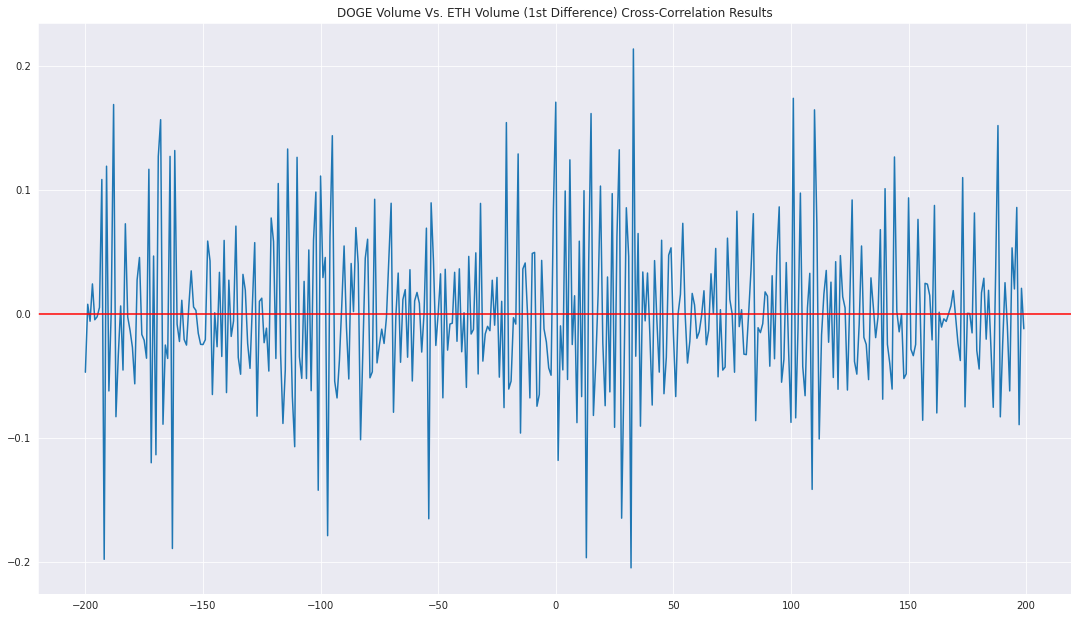

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Volume Vs. ETH Volume (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [ ]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['ethereum_close_1df'], twitter_crypto_data_1df['doge_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 0
Max Cross-Correlation: 0.44660757035327964
Significance Threshold Results: Significant


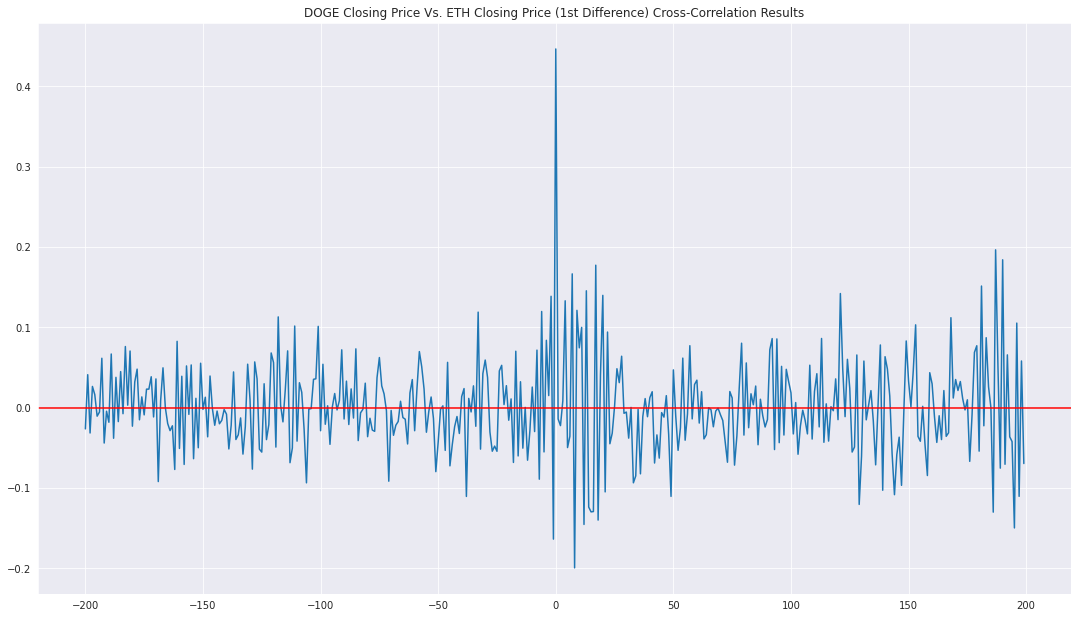

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Closing Price Vs. ETH Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Dogecoin: Bitcoin Results

###### Volume Results

In [ ]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'bitcoin_volume_norm'], twitter_crypto_data_1df['doge_volume_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Closing Price)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Closing Price)
Lag: -49
Max Cross-Correlation: 0.35425928708091614
Significance Threshold Results: Significant


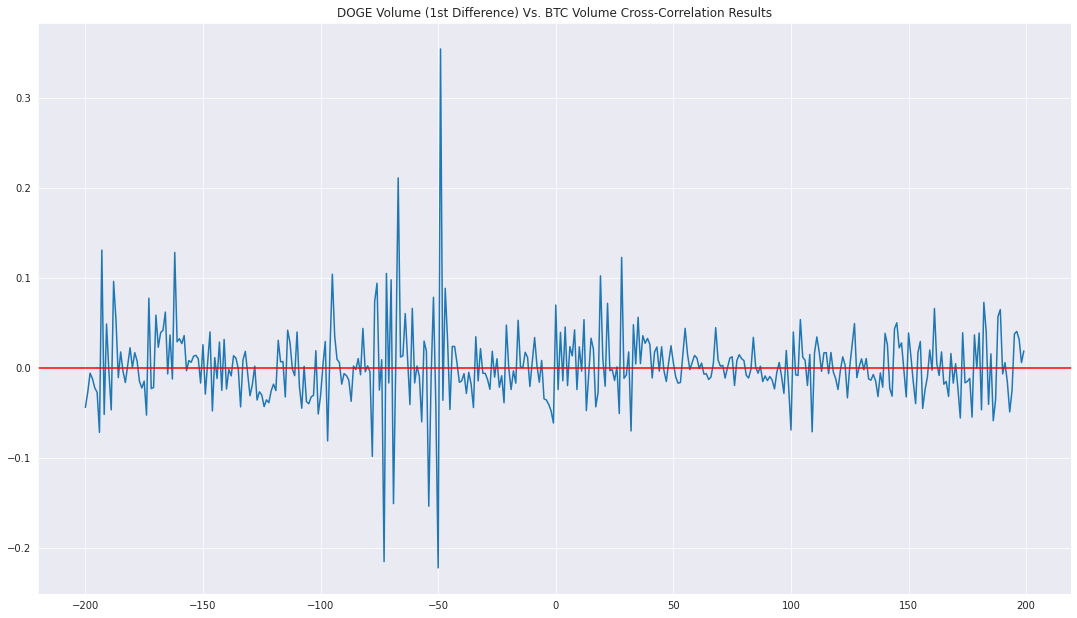

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Volume (1st Difference) Vs. BTC Volume Cross-Correlation Results')

# Render plot
plt.show()

###### Closing Price Results

In [ ]:
# Generate series of lags to assess
lags = np.arange(-(200), (200), 1)  # contrained

## Use first difference; had to remove auto-correlation
# Generate cross-correlation between SHIB & Twitter signal for each lag
#rs = np.nan_to_num([crosscorr(twitter_crypto_data['shib_volume'], twitter_crypto_data['crypto_related_weight'], lag) for lag in lags])
rs = np.nan_to_num([crosscorr(twitter_crypto_data_1df['bitcoin_close_1df'], twitter_crypto_data_1df['doge_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
# Correlations greater than 2 / sqrt(n - |k|) are considered significant
  # n = number of samples
  # k = lag
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 0
Max Cross-Correlation: 0.3751938606441705
Significance Threshold Results: Significant


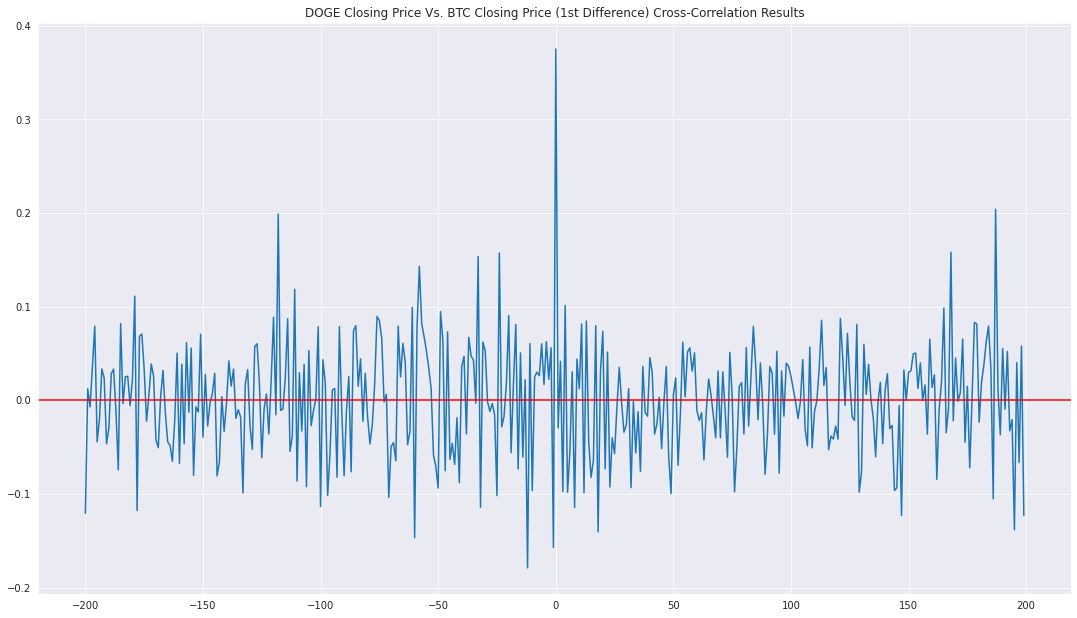

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('DOGE Closing Price Vs. BTC Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Ethereum

In [ ]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['ethereum_volume_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 126
Max Cross-Correlation: 0.1923180677476596
Significance Threshold Results: Significant


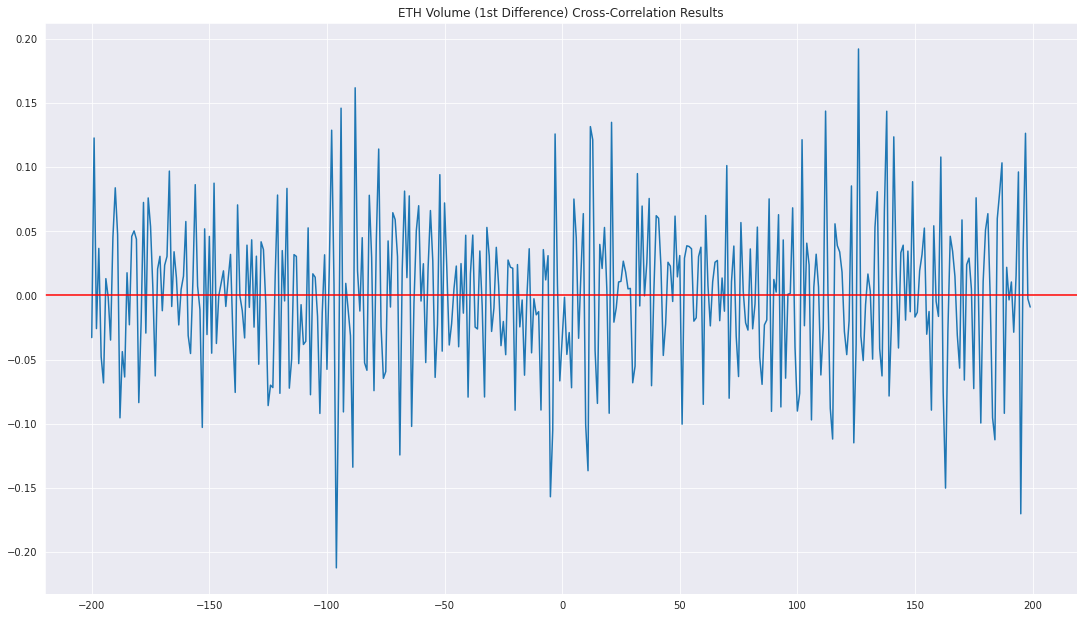

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('ETH Volume (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

In [ ]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['ethereum_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Closing Price)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Closing Price)
Lag: 186
Max Cross-Correlation: 0.15567927736146095
Significance Threshold Results: Significant


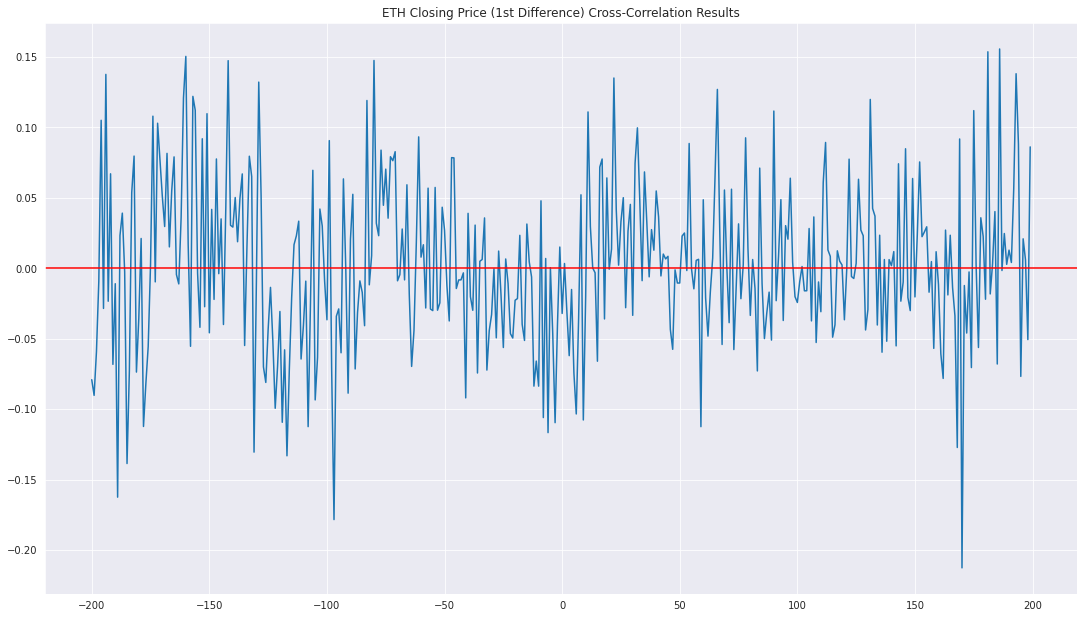

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('ETH Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

##### Bitcoin

In [ ]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_weight'], twitter_crypto_data_1df['bitcoin_volume_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Volume)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Volume)
Lag: 88
Max Cross-Correlation: 0.2709014648568096
Significance Threshold Results: Significant


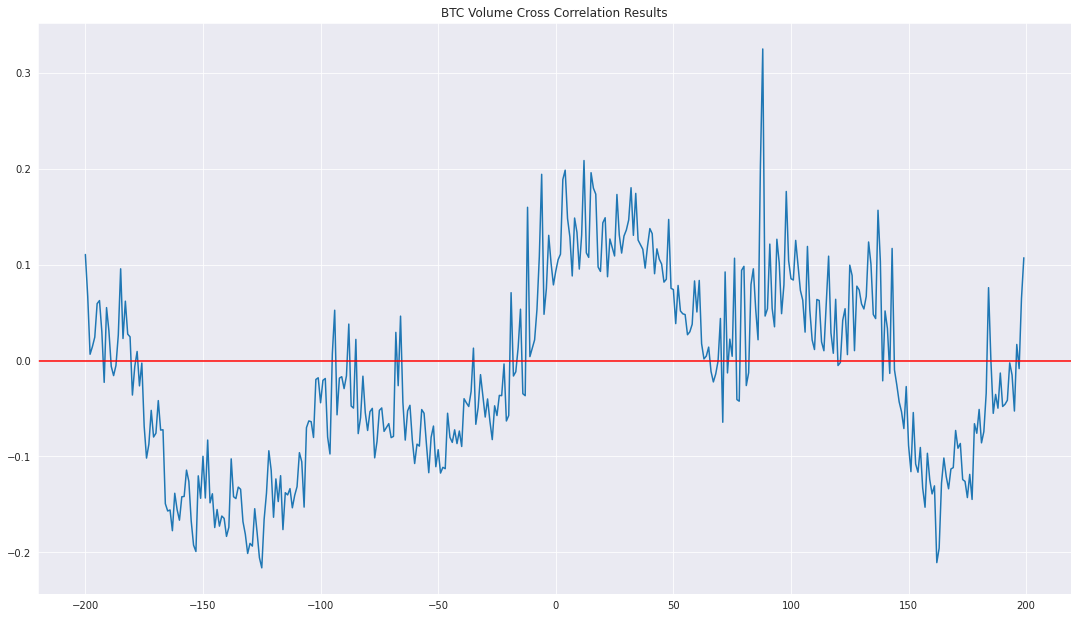

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('BTC Volume Cross Correlation Results')

# Render plot
plt.show()

In [ ]:
# Generate series of lags to assess

# Generate cross-correlation between SHIB & Twitter signal for each lag
rs = np.nan_to_num([crosscorr(twitter_crypto_data.loc[twitter_crypto_data.index > '2020-11-24', 'crypto_related_tweet'], twitter_crypto_data_1df['bitcoin_close_1df'], lag) for lag in lags])

# Rule of Thumb: Generate Benchmark for Cross-Correlation Findings
significance_threshold = 2 /(np.sqrt(len(rs) - np.abs(lags[np.argmax(rs)])))

if np.max(rs) > significance_threshold:
  results = 'Significant'
else:
  results = 'Not Significant'

print(
    "Cross-Correlation Results (Closing Price)\nLag: {}\nMax Cross-Correlation: {}\nSignificance Threshold Results: {}".format(lags[np.argmax(rs)], np.max(rs), results))

Cross-Correlation Results (Closing Price)
Lag: -142
Max Cross-Correlation: 0.19120485146028854
Significance Threshold Results: Significant


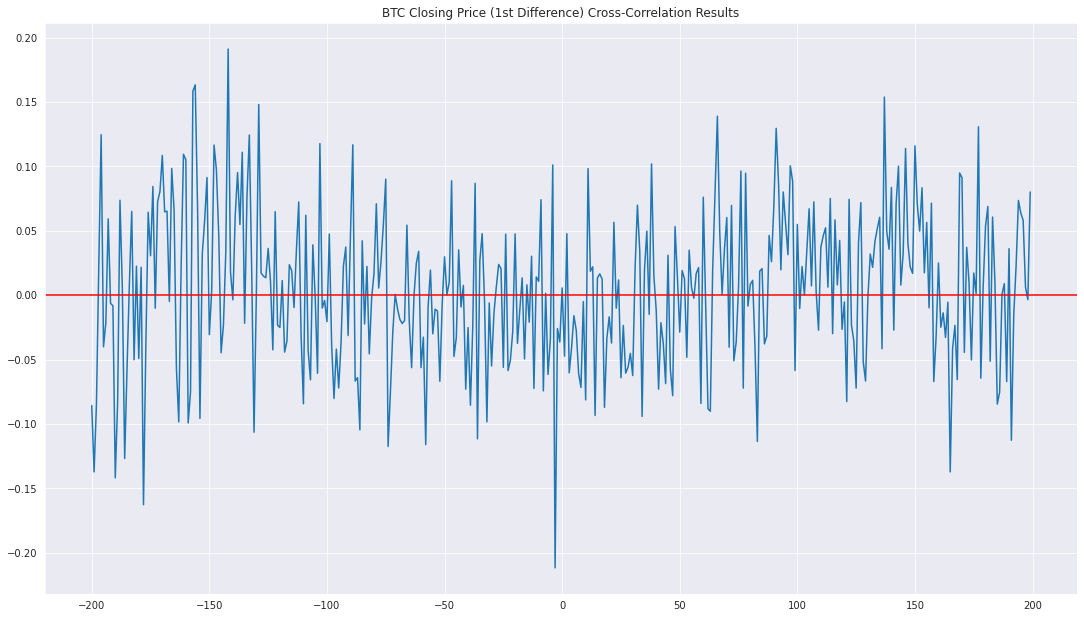

In [ ]:
# Enlarge plot
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# SHIB Normalized Price
combined_plot = sns.lineplot(x=lags,
                             y=rs)

plt.axhline(y=0.0, color='r', linestyle='-')

plt.title('BTC Closing Price (1st Difference) Cross-Correlation Results')

# Render plot
plt.show()

### Granger Test of Causality

Note: Scale of Durbin-Watson's Statistic for quantifying autocorrelation ranges from [0, 4].

12/15/21<br>
Don't trust results, changed approach to concentration of crypto tweets & cherry-picked tests based on previous runs & Cross-corr findings

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests as granger

# Carry of crypto_related_weight into the 1st difference dataframe
twitter_crypto_data_1df = twitter_crypto_data_1df.merge(twitter_crypto_data,
                                         how='left',
                                         on='Date')

twitter_crypto_data_1df.head()

shib_close_1df  ...  dogecoin_volume_norm
Date                        ...                      
2020-11-25   -2.202753e-08  ...              0.002028
2020-11-26    0.000000e+00  ...              0.002044
2020-11-27    0.000000e+00  ...              0.000844
2020-11-28   -9.930461e-08  ...              0.000350
2020-11-29    3.130758e-08  ...              0.000181

[5 rows x 24 columns]

#### Shiba Inu: Crypto-Related Tweets

##### Volume

###### Determine Lag Order

Note: It's often recommended to use AIC when selecting lag order. Since lag order 7 has the smallest AIC we'll utilize this as our lag order.

In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(twitter_crypto_data.loc[:,['crypto_related_weight', 'shib_volume_norm']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -10.007381151207102
BIC :  -9.94379096187311
FPE :  4.506609199627376e-05
HQIC:  -9.98211999288906 

Lag Order = 2
AIC :  -10.017537421756266
BIC :  -9.911339515827763
FPE :  4.4610822247445886e-05
HQIC:  -9.975346041166462 

Lag Order = 3
AIC :  -10.086863916255249
BIC :  -9.937885535130551
FPE :  4.1623124728101834e-05
HQIC:  -10.02767018238997 

Lag Order = 4
AIC :  -10.118686908197839
BIC :  -9.926754121309248
FPE :  4.031983302099925e-05
HQIC:  -10.042418195506144 

Lag Order = 5
AIC :  -10.128258135686192
BIC :  -9.893195829442865
FPE :  3.99364299068795e-05
HQIC:  -10.03484131942661 

Lag Order = 6
AIC :  -10.122872153176889
BIC :  -9.844504019774265
FPE :  4.015308161075028e-05
HQIC:  -10.012233604718915 

Lag Order = 7
AIC :  -10.131609789547705
BIC :  -9.809758315641519
FPE :  3.980509598461528e-05
HQIC:  -10.003675371617302 

Lag Order = 8
AIC :  -10.149479742906136
BIC :  -9.78396619814902
FPE :  3.9101822896282166e-05
HQIC:  -10.004174804774419 

Lag O

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

Looks like the strongest correlation between these two series is 0.09.

In [ ]:
results = model.fit(maxlags=9, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Dec, 2021
Time:                     03:48:36
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.76682
Nobs:                     361.000    HQIC:                  -10.0134
Log likelihood:           850.326    FPE:                3.80739e-05
AIC:                     -10.1762    Det(Omega_mle):     3.43617e-05
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.024378         0.009492            2.568           0.010
L1.crypto_related_weight         0.164002         0.053028            3.093           0.002


###### Durbin-Watson Statistic

Note: There is no autocorrelation present in the crypto-related tweet frequency, and slight negative autocorrelation present in Shiba Inu's volume.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data.loc[:,['crypto_related_weight', 'shib_volume_norm']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 1.98
shib_volume_norm : 2.01


###### Granger Test

It seems that Shiba Inu volume Granger causes crypto related tweet.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=9
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data.loc[:,['crypto_related_weight', 'shib_volume_norm']], variables = twitter_crypto_data.loc[:,['crypto_related_weight', 'shib_volume_norm']].columns)

crypto_related_weight_x  shib_volume_norm_x
crypto_related_weight_y                   1.0000                 0.0
shib_volume_norm_y                        0.0023                 1.0

##### Closing Price

###### Determine Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'shib_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -16.890382860528003
BIC :  -16.826664116970903
FPE :  4.619556042697657e-08
HQIC:  -16.865068032174122 

Lag Order = 2
AIC :  -16.879282930209243
BIC :  -16.77286980083446
FPE :  4.6711308099699854e-08
HQIC:  -16.837001691734045 

Lag Order = 3
AIC :  -16.876816271649098
BIC :  -16.727535215180193
FPE :  4.682695016315378e-08
HQIC:  -16.81749616177778 

Lag Order = 4
AIC :  -16.88660149343646
BIC :  -16.694277788328282
FPE :  4.637146722775618e-08
HQIC:  -16.810169552860437 

Lag Order = 5
AIC :  -16.8613677304067
BIC :  -16.6258254636814
FPE :  4.755728211460783e-08
HQIC:  -16.767750497096106 

Lag Order = 6
AIC :  -16.873872356340822
BIC :  -16.594934412288794
FPE :  4.696744817392431e-08
HQIC:  -16.762995860801137 

Lag Order = 7
AIC :  -16.85826462539086
BIC :  -16.53575267413458
FPE :  4.770786028674647e-08
HQIC:  -16.730054385862875 

Lag Order = 8
AIC :  -16.870591367951242
BIC :  -16.50432585387003
FPE :  4.7125482974811284e-08
HQIC:  -16.72497238555352 

L

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=1, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Dec, 2021
Time:                     23:20:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.8267
Nobs:                     368.000    HQIC:                  -16.8651
Log likelihood:           2069.49    FPE:                4.61956e-08
AIC:                     -16.8904    Det(Omega_mle):     4.54515e-08
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.002377         0.000337            7.063           0.000
L1.crypto_related_weight         0.128535         0.052041            2.470           0.014


###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the crypto-related tweet frequency, and positive autocorrelation present in Shiba Inu's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'shib_close_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 1.99
shib_close_1df : 1.96


###### Granger Test

In [ ]:
maxlag=1
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'shib_close_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'shib_close_1df']].columns)

crypto_related_weight_x  shib_close_1df_x
crypto_related_weight_y                   1.0000            0.3828
shib_close_1df_y                          0.9019            1.0000

#### Shiba Inu: Ethereum

##### Volume

###### Determine Lag Order


In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'shib_volume_norm']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -10.751066480634888
BIC :  -10.687347737077786
FPE :  2.1422564870983548e-05
HQIC:  -10.725751652281005 

Lag Order = 2
AIC :  -10.834235920301248
BIC :  -10.727822790926464
FPE :  1.9712993951409836e-05
HQIC:  -10.791954681826049 

Lag Order = 3
AIC :  -10.93816876920028
BIC :  -10.788887712731375
FPE :  1.7767147729325746e-05
HQIC:  -10.87884865932896 

Lag Order = 4
AIC :  -10.944347707191621
BIC :  -10.752024002083443
FPE :  1.7657892435419232e-05
HQIC:  -10.8679157666156 

Lag Order = 5
AIC :  -10.961655053662268
BIC :  -10.72611278693697
FPE :  1.735520257192451e-05
HQIC:  -10.868037820351674 

Lag Order = 6
AIC :  -10.972485508474382
BIC :  -10.693547564422353
FPE :  1.7168672186870204e-05
HQIC:  -10.861609012934696 

Lag Order = 7
AIC :  -10.965414676475351
BIC :  -10.642902725219072
FPE :  1.7291081358063652e-05
HQIC:  -10.837204436947365 

Lag Order = 8
AIC :  -10.956776179069786
BIC :  -10.590510664988575
FPE :  1.7441872911292976e-05
HQIC:  -10.81115719

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=6, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:27:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.6935
Nobs:                     363.000    HQIC:                  -10.8616
Log likelihood:           987.357    FPE:                1.71687e-05
AIC:                     -10.9725    Det(Omega_mle):     1.60020e-05
--------------------------------------------------------------------
Results for equation ethereum_volume_1df
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.000669         0.004970            0.135           0.893
L1.ethereum_volume_1df        -0.347455         0.053171           -6.535           0.000
L1.shib_vo

###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the Ethereum volume, and negative autocorrelation present in Shiba Inu's volume (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'shib_volume_norm']].columns, out):
    print(col, ':', round(val, 2))

ethereum_volume_1df : 1.99
shib_volume_norm : 2.02


###### Granger Test

In [ ]:
maxlag=6
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'shib_volume_norm']], variables = twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'shib_volume_norm']].columns)

ethereum_volume_1df_x  shib_volume_norm_x
ethereum_volume_1df_y                 1.0000              0.5769
shib_volume_norm_y                    0.0183              1.0000

##### Closing Price

###### Determine Lag Order


In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'shib_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -13.481492036185765
BIC :  -13.417773292628663
FPE :  1.396570019155461e-06
HQIC:  -13.456177207831882 

Lag Order = 2
AIC :  -13.47244048776916
BIC :  -13.366027358394376
FPE :  1.4092722582983762e-06
HQIC:  -13.430159249293961 

Lag Order = 3
AIC :  -13.456636292990675
BIC :  -13.30735523652177
FPE :  1.4317301313886188e-06
HQIC:  -13.397316183119356 

Lag Order = 4
AIC :  -13.438634151443864
BIC :  -13.246310446335686
FPE :  1.4577532821846479e-06
HQIC:  -13.362202210867842 

Lag Order = 5
AIC :  -13.433331389045632
BIC :  -13.197789122320334
FPE :  1.4655285847755805e-06
HQIC:  -13.339714155735038 

Lag Order = 6
AIC :  -13.42236822393333
BIC :  -13.1434302798813
FPE :  1.4817200711049048e-06
HQIC:  -13.311491728393644 

Lag Order = 7
AIC :  -13.416980575785365
BIC :  -13.094468624529085
FPE :  1.4897747601228897e-06
HQIC:  -13.288770336257379 

Lag Order = 8
AIC :  -13.455883828499447
BIC :  -13.089618314418235
FPE :  1.4329942768124004e-06
HQIC:  -13.31026484

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

Correlation between series seems to be 0.15

In [ ]:
results = model.fit(maxlags=1, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:31:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.4178
Nobs:                     368.000    HQIC:                  -13.4562
Log likelihood:           1442.26    FPE:                1.39657e-06
AIC:                     -13.4815    Det(Omega_mle):     1.37408e-06
--------------------------------------------------------------------
Results for equation ethereum_close_1df
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.002565         0.001704            1.506           0.132
L1.ethereum_close_1df        -0.148596         0.052195           -2.847           0.004
L1.shib_close_1

###### Durbin-Watson Statistic

Note: There is slight negative autocorrelation present in the Ethereum closing price, and slight negative autocorrelation present in Shiba Inu's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'shib_close_1df']].columns, out):
    print(col, ':', round(val, 2))

ethereum_close_1df : 1.99
shib_close_1df : 1.95


###### Granger Test

In [ ]:
maxlag=1
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'shib_close_1df']], variables = twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'shib_close_1df']].columns)

ethereum_close_1df_x  shib_close_1df_x
ethereum_close_1df_y                1.0000            0.0425
shib_close_1df_y                    0.1346            1.0000

#### Shiba Inu: Bitcoin

##### Volume

###### Determine Lag Order


In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'shib_volume_norm']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -11.428356286803414
BIC :  -11.364637543246312
FPE :  1.0882489107866362e-05
HQIC:  -11.40304145844953 

Lag Order = 2
AIC :  -11.519066250669306
BIC :  -11.412653121294522
FPE :  9.938813818405718e-06
HQIC:  -11.476785012194107 

Lag Order = 3
AIC :  -11.635673251464564
BIC :  -11.486392194995659
FPE :  8.84494966288204e-06
HQIC:  -11.576353141593245 

Lag Order = 4
AIC :  -11.663899409487282
BIC :  -11.471575704379104
FPE :  8.598872969518746e-06
HQIC:  -11.58746746891126 

Lag Order = 5
AIC :  -11.640241382949128
BIC :  -11.40469911622383
FPE :  8.804878934389963e-06
HQIC:  -11.546624149638534 

Lag Order = 6
AIC :  -11.647733183098007
BIC :  -11.368795239045978
FPE :  8.739374887794521e-06
HQIC:  -11.536856687558322 

Lag Order = 7
AIC :  -11.63064335687312
BIC :  -11.308131405616841
FPE :  8.890312135282456e-06
HQIC:  -11.502433117345134 

Lag Order = 8
AIC :  -11.606988483302864
BIC :  -11.240722969221652
FPE :  9.103523170461391e-06
HQIC:  -11.46136950090514

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:36:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.4716
Nobs:                     365.000    HQIC:                  -11.5875
Log likelihood:           1110.84    FPE:                8.59887e-06
AIC:                     -11.6639    Det(Omega_mle):     8.19000e-06
--------------------------------------------------------------------
Results for equation bitcoin_volume_norm
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.021301         0.006152            3.462           0.001
L1.bitcoin_volume_norm         0.212998         0.052208            4.080           0.000
L1.shib_vo

###### Durbin-Watson Statistic

Note: There is slight negative autocorrelation present in the Bitcoin volume, and slight negative autocorrelation present in Shiba Inu's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'shib_volume_norm']].columns, out):
    print(col, ':', round(val, 2))

bitcoin_volume_norm : 2.01
shib_volume_norm : 2.0


###### Granger Test

In [ ]:
maxlag=4
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'shib_volume_norm']], variables = twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'shib_volume_norm']].columns)

bitcoin_volume_norm_x  shib_volume_norm_x
bitcoin_volume_norm_y                  1.000              0.2503
shib_volume_norm_y                     0.477              1.0000

##### Closing Price

###### Determine Lag Order


###### Results of Lag Order Selection

###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the crypto-related tweet frequency, and positive autocorrelation present in Shiba Inu's closing price (1st difference).

###### Granger Test

#### Dogecoin: Crypto-Related Tweets

##### Volume

###### Deterimining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_volume_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -9.280708549768706
BIC :  -9.216989806211604
FPE :  9.320512697065502e-05
HQIC:  -9.255393721414823 

Lag Order = 2
AIC :  -9.30299540099794
BIC :  -9.196582271623155
FPE :  9.115109635240146e-05
HQIC:  -9.26071416252274 

Lag Order = 3
AIC :  -9.329906256339632
BIC :  -9.180625199870727
FPE :  8.873138249941619e-05
HQIC:  -9.270586146468313 

Lag Order = 4
AIC :  -9.32874376916915
BIC :  -9.136420064060973
FPE :  8.883553909203216e-05
HQIC:  -9.252311828593129 

Lag Order = 5
AIC :  -9.311540963037832
BIC :  -9.075998696312533
FPE :  9.037850043999037e-05
HQIC:  -9.217923729727238 

Lag Order = 6
AIC :  -9.287890529423397
BIC :  -9.008952585371368
FPE :  9.254373259933556e-05
HQIC:  -9.177014033883712 

Lag Order = 7
AIC :  -9.27646775514608
BIC :  -8.9539558038898
FPE :  9.361005111886724e-05
HQIC:  -9.148257515618093 

Lag Order = 8
AIC :  -9.287592615312409
BIC :  -8.921327101231197
FPE :  9.25785402629859e-05
HQIC:  -9.141973632914688 

Lag Order = 9
AIC :  -9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=3, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Dec, 2021
Time:                     03:52:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.18063
Nobs:                     366.000    HQIC:                  -9.27059
Log likelihood:           682.710    FPE:                8.87314e-05
AIC:                     -9.32991    Det(Omega_mle):     8.54322e-05
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.043825         0.008479            5.168           0.000
L1.crypto_related_weight         0.201512         0.052010            3.875           0.000


###### Durbin-Watson Statistic

Note: There is slight negative autocorrelation present in the crypto-related tweet frequency, and no autocorrelation present in Dogecoin's volume (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_volume_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.05
doge_volume_1df : 2.0


###### Granger Test

In [ ]:
maxlag=3
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_volume_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_volume_1df']].columns)

crypto_related_weight_x  doge_volume_1df_x
crypto_related_weight_y                   1.0000             0.1083
doge_volume_1df_y                         0.5544             1.0000

##### Closing Price

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -10.50327629776507
BIC :  -10.439557554207969
FPE :  2.74463991980972e-05
HQIC:  -10.477961469411188 

Lag Order = 2
AIC :  -10.486581087968796
BIC :  -10.380167958594011
FPE :  2.7908542983517118e-05
HQIC:  -10.444299849493596 

Lag Order = 3
AIC :  -10.513607582060954
BIC :  -10.36432652559205
FPE :  2.7164536187947394e-05
HQIC:  -10.454287472189636 

Lag Order = 4
AIC :  -10.520572912258572
BIC :  -10.328249207150394
FPE :  2.6976271380598322e-05
HQIC:  -10.44414097168255 

Lag Order = 5
AIC :  -10.563768968921075
BIC :  -10.328226702195776
FPE :  2.5836246426702155e-05
HQIC:  -10.47015173561048 

Lag Order = 6
AIC :  -10.57510709793669
BIC :  -10.296169153884662
FPE :  2.554559128041653e-05
HQIC:  -10.464230602397006 

Lag Order = 7
AIC :  -10.565619291928616
BIC :  -10.243107340672337
FPE :  2.578998464956744e-05
HQIC:  -10.43740905240063 

Lag Order = 8
AIC :  -10.558895690518664
BIC :  -10.192630176437453
FPE :  2.596512503922913e-05
HQIC:  -10.4132767081209

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=6, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Dec, 2021
Time:                     03:53:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.2962
Nobs:                     363.000    HQIC:                  -10.4642
Log likelihood:           915.233    FPE:                2.55456e-05
AIC:                     -10.5751    Det(Omega_mle):     2.38097e-05
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.035631         0.009196            3.875           0.000
L1.crypto_related_weight         0.161886         0.052935            3.058           0.002


###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the crypto-related tweet frequency, and slight positive autocorrelation present in Dogecoin's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_close_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.02
doge_close_1df : 1.97


###### Granger Test

In [ ]:
maxlag=6
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_close_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'doge_close_1df']].columns)

crypto_related_weight_x  doge_close_1df_x
crypto_related_weight_y                   1.0000            0.0372
doge_close_1df_y                          0.0554            1.0000

#### Dogecoin: Ethereum

##### Volume

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'doge_volume_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -10.080867633438755
BIC :  -10.017148889881653
FPE :  4.187310129562583e-05
HQIC:  -10.055552805084872 

Lag Order = 2
AIC :  -10.172248653389957
BIC :  -10.065835524015172
FPE :  3.8216420400281496e-05
HQIC:  -10.129967414914757 

Lag Order = 3
AIC :  -10.225020019506328
BIC :  -10.075738963037423
FPE :  3.6252192728326704e-05
HQIC:  -10.16569990963501 

Lag Order = 4
AIC :  -10.212084753056939
BIC :  -10.01976104794876
FPE :  3.672456220337387e-05
HQIC:  -10.135652812480917 

Lag Order = 5
AIC :  -10.229901069475515
BIC :  -9.994358802750217
FPE :  3.6076666740440614e-05
HQIC:  -10.136283836164921 

Lag Order = 6
AIC :  -10.2522451818243
BIC :  -9.973307237772271
FPE :  3.528036811728673e-05
HQIC:  -10.141368686284615 

Lag Order = 7
AIC :  -10.246633808613758
BIC :  -9.924121857357479
FPE :  3.5480090493907865e-05
HQIC:  -10.118423569085772 

Lag Order = 8
AIC :  -10.28868190052902
BIC :  -9.922416386447809
FPE :  3.4020663260058376e-05
HQIC:  -10.1430629181313 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

Coeff is 0.21

In [ ]:
results = model.fit(maxlags=8, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:40:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.92242
Nobs:                     361.000    HQIC:                  -10.1431
Log likelihood:           866.633    FPE:                3.40207e-05
AIC:                     -10.2887    Det(Omega_mle):     3.10294e-05
--------------------------------------------------------------------
Results for equation ethereum_volume_1df
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.000017         0.004388           -0.004           0.997
L1.ethereum_volume_1df        -0.353429         0.054453           -6.491           0.000
L1.doge_vo

###### Durbin-Watson Statistic

Note: There is slight negative autocorrelation present in the Ethereum volume, (1st difference) and slight negative autocorrelation present in Dogecoin's volume (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'doge_volume_1df']].columns, out):
    print(col, ':', round(val, 2))

ethereum_volume_1df : 2.0
doge_volume_1df : 2.05


###### Granger Test

In [ ]:
maxlag=8
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'doge_volume_1df']], variables = twitter_crypto_data_1df.loc[:,['ethereum_volume_1df', 'doge_volume_1df']].columns)

ethereum_volume_1df_x  doge_volume_1df_x
ethereum_volume_1df_y                 1.0000              0.006
doge_volume_1df_y                     0.0027              1.000

##### Closing Price

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'doge_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -13.54669581775874
BIC :  -13.482977074201639
FPE :  1.308413667514624e-06
HQIC:  -13.521380989404857 

Lag Order = 2
AIC :  -13.537605631540957
BIC :  -13.431192502166173
FPE :  1.3203651122112277e-06
HQIC:  -13.495324393065758 

Lag Order = 3
AIC :  -13.518215806780622
BIC :  -13.368934750311718
FPE :  1.3462245988793826e-06
HQIC:  -13.458895696909304 

Lag Order = 4
AIC :  -13.516209457890094
BIC :  -13.323885752781916
FPE :  1.3489426943310279e-06
HQIC:  -13.439777517314072 

Lag Order = 5
AIC :  -13.573357853814713
BIC :  -13.337815587089414
FPE :  1.2740356268821806e-06
HQIC:  -13.479740620504119 

Lag Order = 6
AIC :  -13.582088778333695
BIC :  -13.303150834281666
FPE :  1.2629914436711186e-06
HQIC:  -13.47121228279401 

Lag Order = 7
AIC :  -13.589212629607903
BIC :  -13.266700678351624
FPE :  1.2540682756307278e-06
HQIC:  -13.461002390079917 

Lag Order = 8
AIC :  -13.599763883383993
BIC :  -13.233498369302781
FPE :  1.2409610256179188e-06
HQIC:  -13.45414

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

Coef is 0.43

In [ ]:
results = model.fit(maxlags=12, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:43:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -13.0726
Nobs:                     357.000    HQIC:                  -13.3996
Log likelihood:           1467.27    FPE:                1.22179e-06
AIC:                     -13.6157    Det(Omega_mle):     1.06710e-06
--------------------------------------------------------------------
Results for equation ethereum_close_1df
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.002999         0.001718            1.746           0.081
L1.ethereum_close_1df         -0.074414         0.061182           -1.216           0.224
L1.doge_clo

###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the ETH closing price (1st difference), and slight positive autocorrelation present in Dogecoin's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'doge_close_1df']].columns, out):
    print(col, ':', round(val, 2))

ethereum_close_1df : 1.99
doge_close_1df : 1.99


###### Granger Test

In [ ]:
maxlag=12
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'doge_close_1df']], variables = twitter_crypto_data_1df.loc[:,['ethereum_close_1df', 'doge_close_1df']].columns)

ethereum_close_1df_x  doge_close_1df_x
ethereum_close_1df_y                1.0000               0.0
doge_close_1df_y                    0.0059               1.0

#### Dogecoin: Bitcoin

##### Volume

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'doge_volume_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -10.728553220646097
BIC :  -10.664834477088995
FPE :  2.1910326595271696e-05
HQIC:  -10.703238392292214 

Lag Order = 2
AIC :  -10.83345786273476
BIC :  -10.727044733359975
FPE :  1.9728337763922532e-05
HQIC:  -10.79117662425956 

Lag Order = 3
AIC :  -10.916709328124595
BIC :  -10.76742827165569
FPE :  1.8152541163346392e-05
HQIC:  -10.857389218253276 

Lag Order = 4
AIC :  -10.93087542463579
BIC :  -10.738551719527612
FPE :  1.7897394247188276e-05
HQIC:  -10.854443484059768 

Lag Order = 5
AIC :  -10.910251471562596
BIC :  -10.674709204837297
FPE :  1.8270649203223595e-05
HQIC:  -10.816634238252002 

Lag Order = 6
AIC :  -10.897104375654113
BIC :  -10.618166431602084
FPE :  1.8512894169085873e-05
HQIC:  -10.786227880114428 

Lag Order = 7
AIC :  -10.880179676218894
BIC :  -10.557667724962615
FPE :  1.8829519798285458e-05
HQIC:  -10.751969436690908 

Lag Order = 8
AIC :  -10.881839730295109
BIC :  -10.515574216213897
FPE :  1.87991236275218e-05
HQIC:  -10.73622074

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

Coeff: 0.15

In [ ]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:49:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.7386
Nobs:                     365.000    HQIC:                  -10.8544
Log likelihood:           977.060    FPE:                1.78974e-05
AIC:                     -10.9309    Det(Omega_mle):     1.70464e-05
--------------------------------------------------------------------
Results for equation bitcoin_volume_norm
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.020057         0.005798            3.459           0.001
L1.bitcoin_volume_norm         0.214824         0.052627            4.082           0.000
L1.doge_vo

###### Durbin-Watson Statistic

Note: There is slight negative autocorrelation present in the Bitcoin volume, and no autocorrelation present in Dogecoin's volume (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'doge_volume_1df']].columns, out):
    print(col, ':', round(val, 2))

bitcoin_volume_norm : 2.02
doge_volume_1df : 2.0


###### Granger Test

In [ ]:
maxlag=4
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'doge_volume_1df']], variables = twitter_crypto_data_1df.loc[:,['bitcoin_volume_norm', 'doge_volume_1df']].columns)

bitcoin_volume_norm_x  doge_volume_1df_x
bitcoin_volume_norm_y                  1.000             0.2204
doge_volume_1df_y                      0.448             1.0000

##### Closing Price

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['bitcoin_close_1df', 'doge_volume_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -11.879670363608051
BIC :  -11.81595162005095
FPE :  6.929869048853481e-06
HQIC:  -11.854355535254168 

Lag Order = 2
AIC :  -11.902711924167173
BIC :  -11.796298794792389
FPE :  6.772037527916865e-06
HQIC:  -11.860430685691973 

Lag Order = 3
AIC :  -11.914739687629835
BIC :  -11.76545863116093
FPE :  6.691112815255078e-06
HQIC:  -11.855419577758516 

Lag Order = 4
AIC :  -11.894315686438865
BIC :  -11.701991981330687
FPE :  6.829250066750348e-06
HQIC:  -11.817883745862844 

Lag Order = 5
AIC :  -11.867720782324634
BIC :  -11.632178515599335
FPE :  7.0134279693203756e-06
HQIC:  -11.77410354901404 

Lag Order = 6
AIC :  -11.850698600959152
BIC :  -11.571760656907124
FPE :  7.134008269566798e-06
HQIC:  -11.739822105419467 

Lag Order = 7
AIC :  -11.837789080277348
BIC :  -11.515277129021069
FPE :  7.2269452487068465e-06
HQIC:  -11.709578840749362 

Lag Order = 8
AIC :  -11.854301055240299
BIC :  -11.488035541159087
FPE :  7.108910009867567e-06
HQIC:  -11.70868207284

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=3, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 13, Dec, 2021
Time:                     03:52:48
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.7655
Nobs:                     366.000    HQIC:                  -11.8554
Log likelihood:           1155.73    FPE:                6.69111e-06
AIC:                     -11.9147    Det(Omega_mle):     6.44233e-06
--------------------------------------------------------------------
Results for equation bitcoin_close_1df
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.002213         0.001925            1.150           0.250
L1.bitcoin_close_1df        -0.055602         0.052790           -1.053           0.292
L1.doge_volume_1df  

###### Durbin-Watson Statistic

Note: There is slight positive autocorrelation present in the Bitcoin closing price (1st difference), and slight negative autocorrelation present in Dogecoin's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['bitcoin_close_1df', 'doge_close_1df']].columns, out):
    print(col, ':', round(val, 2))

bitcoin_close_1df : 1.99
doge_close_1df : 2.01


###### Granger Test

In [ ]:
maxlag=3
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['bitcoin_close_1df', 'doge_close_1df']], variables = twitter_crypto_data_1df.loc[:,['bitcoin_close_1df', 'doge_close_1df']].columns)

bitcoin_close_1df_x  doge_close_1df_x
bitcoin_close_1df_y               1.0000             0.213
doge_close_1df_y                  0.0242             1.000

#### Ethereum (Volume)

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_volume_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -8.760364560997825
BIC :  -8.696645817440723
FPE :  0.0001568275382929726
HQIC:  -8.735049732643942 

Lag Order = 2
AIC :  -8.812485253775792
BIC :  -8.706072124401008
FPE :  0.00014886333589246367
HQIC:  -8.770204015300592 

Lag Order = 3
AIC :  -8.886017448481995
BIC :  -8.736736392013091
FPE :  0.0001383106772941516
HQIC:  -8.826697338610677 

Lag Order = 4
AIC :  -8.9190001651208
BIC :  -8.726676460012621
FPE :  0.00013382465375539094
HQIC:  -8.842568224544777 

Lag Order = 5
AIC :  -8.960630688642954
BIC :  -8.725088421917656
FPE :  0.00012836999581765314
HQIC:  -8.86701345533236 

Lag Order = 6
AIC :  -8.955578811625294
BIC :  -8.676640867573266
FPE :  0.0001290233035145641
HQIC:  -8.844702316085609 

Lag Order = 7
AIC :  -8.939332713755263
BIC :  -8.616820762498984
FPE :  0.00013114096362317807
HQIC:  -8.811122474227277 

Lag Order = 8
AIC :  -8.929687104284469
BIC :  -8.563421590203257
FPE :  0.00013241790641741255
HQIC:  -8.784068121886747 

Lag Order = 9


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=5, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Dec, 2021
Time:                     04:09:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.72509
Nobs:                     364.000    HQIC:                  -8.86701
Log likelihood:           619.848    FPE:                0.000128370
AIC:                     -8.96063    Det(Omega_mle):     0.000120949
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.034907         0.008994            3.881           0.000
L1.crypto_related_weight         0.159110         0.053097            2.997           0.003


###### Durbin-Watson's Statistic

Note: There is no autocorrelation present in the crypto-related tweet frequency, and slight negative autocorrelation present in Ethereum's volume (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_volume_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.01
ethereum_volume_1df : 2.06


###### Granger Test

In [ ]:
maxlag=5
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_volume_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_volume_1df']].columns)

crypto_related_weight_x  ethereum_volume_1df_x
crypto_related_weight_y                   1.0000                 0.2901
ethereum_volume_1df_y                     0.0008                 1.0000

#### Ethereum (Closing Price)

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -17.114564416605642
BIC :  -17.050845673048542
FPE :  3.6918107274710855e-08
HQIC:  -17.08924958825176 

Lag Order = 2
AIC :  -17.09927052103181
BIC :  -16.992857391657026
FPE :  3.748716800945918e-08
HQIC:  -17.05698928255661 

Lag Order = 3
AIC :  -17.15274425612996
BIC :  -17.003463199661056
FPE :  3.55354543039574e-08
HQIC:  -17.09342414625864 

Lag Order = 4
AIC :  -17.166576183761936
BIC :  -16.97425247865376
FPE :  3.504768803253666e-08
HQIC:  -17.090144243185915 

Lag Order = 5
AIC :  -17.144731769947384
BIC :  -16.909189503222088
FPE :  3.582231001893835e-08
HQIC:  -17.051114536636792 

Lag Order = 6
AIC :  -17.13232965974247
BIC :  -16.853391715690442
FPE :  3.627023622788739e-08
HQIC:  -17.021453164202786 

Lag Order = 7
AIC :  -17.107915996831323
BIC :  -16.785404045575046
FPE :  3.7167874474054164e-08
HQIC:  -16.97970575730334 

Lag Order = 8
AIC :  -17.095139371302494
BIC :  -16.72887385722128
FPE :  3.764747515973322e-08
HQIC:  -16.949520388904773 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Dec, 2021
Time:                     23:10:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.9743
Nobs:                     365.000    HQIC:                  -17.0901
Log likelihood:           2115.08    FPE:                3.50477e-08
AIC:                     -17.1666    Det(Omega_mle):     3.33812e-08
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.002031         0.000405            5.020           0.000
L1.crypto_related_weight         0.145234         0.052515            2.766           0.006


###### Durbin-Watson's Statistic

Note: There is slight negative autocorrelation present in the crypto-related tweet frequency, and slight positive autocorrelation present in Ethereum's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_close_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.01
ethereum_close_1df : 1.99


###### Granger Test

In [ ]:
maxlag=4
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_close_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'ethereum_close_1df']].columns)

crypto_related_weight_x  ethereum_close_1df_x
crypto_related_weight_y                      1.0                0.0005
ethereum_close_1df_y                         0.0                1.0000

#### Bitcoin (Volume) 

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data.loc[:,['crypto_related_weight', 'bitcoin_volume_norm']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -9.465671873828597
BIC :  -9.402081684494606
FPE :  7.746602093560361e-05
HQIC:  -9.440410715510556 

Lag Order = 2
AIC :  -9.524452292861582
BIC :  -9.418254386933079
FPE :  7.30439715474594e-05
HQIC:  -9.482260912271778 

Lag Order = 3
AIC :  -9.62044872879322
BIC :  -9.471470347668522
FPE :  6.635844837856052e-05
HQIC:  -9.56125499492794 

Lag Order = 4
AIC :  -9.661128391850689
BIC :  -9.469195604962097
FPE :  6.371385219055092e-05
HQIC:  -9.584859679158994 

Lag Order = 5
AIC :  -9.640722787558389
BIC :  -9.405660481315062
FPE :  6.502841223595161e-05
HQIC:  -9.547305971298806 

Lag Order = 6
AIC :  -9.653431720778201
BIC :  -9.375063587375577
FPE :  6.420875822189494e-05
HQIC:  -9.542793172320227 

Lag Order = 7
AIC :  -9.640581657287596
BIC :  -9.31873018338141
FPE :  6.504134054863724e-05
HQIC:  -9.512647239357193 

Lag Order = 8
AIC :  -9.619560691154517
BIC :  -9.2540471463974
FPE :  6.642597296057832e-05
HQIC:  -9.474255753022799 

Lag Order = 9
AIC :  -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Dec, 2021
Time:                     04:10:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.46920
Nobs:                     366.000    HQIC:                  -9.58486
Log likelihood:           747.323    FPE:                6.37139e-05
AIC:                     -9.66113    Det(Omega_mle):     6.06923e-05
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.008649         0.012877            0.672           0.502
L1.crypto_related_weight         0.141346         0.051972            2.720           0.007


###### Durbin-Watson's Statistic

Note: There is no autocorrelation present in the crypto-related tweet frequency, and slight negative autocorrelation present in Ethereum's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data.loc[:,['crypto_related_weight', 'bitcoin_volume_norm']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.02
bitcoin_volume_norm : 2.01


###### Granger Test

In [ ]:
maxlag=4
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_volume_norm']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_volume_norm']].columns)

crypto_related_weight_x  bitcoin_volume_norm_x
crypto_related_weight_y                    1.000                 0.0082
bitcoin_volume_norm_y                      0.432                 1.0000

#### Bitcoin (Closing Price)

###### Determining Lag Order

In [ ]:
model = VAR(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_close_1df']])
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -16.870882857626846
BIC :  -16.807164114069746
FPE :  4.7105214291337524e-08
HQIC:  -16.845568029272965 

Lag Order = 2
AIC :  -16.85163100846957
BIC :  -16.74521787909479
FPE :  4.802098969144734e-08
HQIC:  -16.809349769994373 

Lag Order = 3
AIC :  -16.883179067207134
BIC :  -16.73389801073823
FPE :  4.652994574388123e-08
HQIC:  -16.823858957335815 

Lag Order = 4
AIC :  -16.898002120841223
BIC :  -16.705678415733047
FPE :  4.5845805537745073e-08
HQIC:  -16.8215701802652 

Lag Order = 5
AIC :  -16.87530178920988
BIC :  -16.639759522484585
FPE :  4.68992115932108e-08
HQIC:  -16.78168455589929 

Lag Order = 6
AIC :  -16.853942206185764
BIC :  -16.575004262133735
FPE :  4.7912906738682124e-08
HQIC:  -16.74306571064608 

Lag Order = 7
AIC :  -16.83420604907407
BIC :  -16.51169409781779
FPE :  4.886956189409319e-08
HQIC:  -16.705995809546085 

Lag Order = 8
AIC :  -16.824724930344157
BIC :  -16.458459416262944
FPE :  4.933729727934564e-08
HQIC:  -16.679105947946436 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


###### Results of Lag Order Selection

In [ ]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 12, Dec, 2021
Time:                     23:15:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.7057
Nobs:                     365.000    HQIC:                  -16.8216
Log likelihood:           2066.06    FPE:                4.58458e-08
AIC:                     -16.8980    Det(Omega_mle):     4.36659e-08
--------------------------------------------------------------------
Results for equation crypto_related_weight
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.001950         0.000405            4.820           0.000
L1.crypto_related_weight         0.122865         0.052355            2.347           0.019


###### Durbin-Watson's Statistic

Note: There is slight positive autocorrelation present in the crypto-related tweet frequency, and slight negative autocorrelation present in Ethereum's closing price (1st difference).

In [ ]:
out = durbin_watson(results.resid)

for col, val in zip(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_close_1df']].columns, out):
    print(col, ':', round(val, 2))

crypto_related_weight : 2.01
bitcoin_close_1df : 1.99


###### Granger Test

In [ ]:
maxlag=4
test = 'ssr_chi2test'

grangers_causation_matrix(twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_close_1df']], variables = twitter_crypto_data_1df.loc[:,['crypto_related_weight', 'bitcoin_close_1df']].columns)

crypto_related_weight_x  bitcoin_close_1df_x
crypto_related_weight_y                   1.0000               0.2995
bitcoin_close_1df_y                       0.0001               1.0000

### References 

Interpret PACF<br>
- https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/

Interpret ACF<br>
- https://www.alpharithms.com/autocorrelation-time-series-python-432909/

Cross-Correlation (Normalized) <br>
- https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
- https://www.researchgate.net/post/How-can-I-find-the-cross-correlation-between-two-time-series-atmospheric-data#:~:text=Cross%2Dcorrelation%3A%20is%20the%20degree,distance%2C%20angle%2C%20direction%20etc.<br>
- https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0<br>
- https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/cross-correlation/interpret-the-results/all-statistics-and-graphs/<br>
- https://www.usna.edu/Users/oceano/pguth/md_help/html/time0alq.htm<br>
- https://www.svds.com/avoiding-common-mistakes-with-time-series/
- https://online.stat.psu.edu/stat510/lesson/8/8.2

Correlation<br>
- https://www.businessperspectives.org/images/pdf/applications/publishing/templates/article/assets/13931/IMFI_2020_03_Lahajnar.pdf
- https://www.tastytrade.com/concepts-strategies/correlation

Rescaling Approaches<br>
- https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034

Granger Test<br>
- https://www.statisticshowto.com/granger-causality/
- https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2


### Definitions

**secular trend**<br>
While looking at two series, both dependent on the observed timeframe, show signs of growth over time.